### INICIANDO GERAÇÃO: ANÁLISE GERAL DO SISTEMA ###


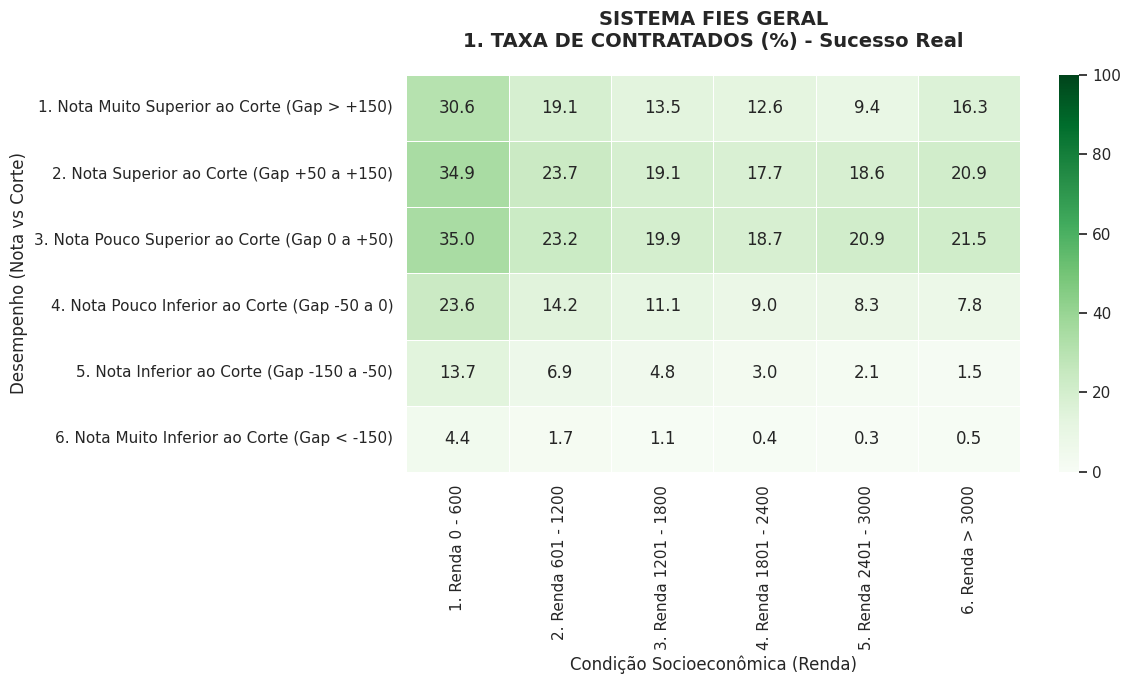

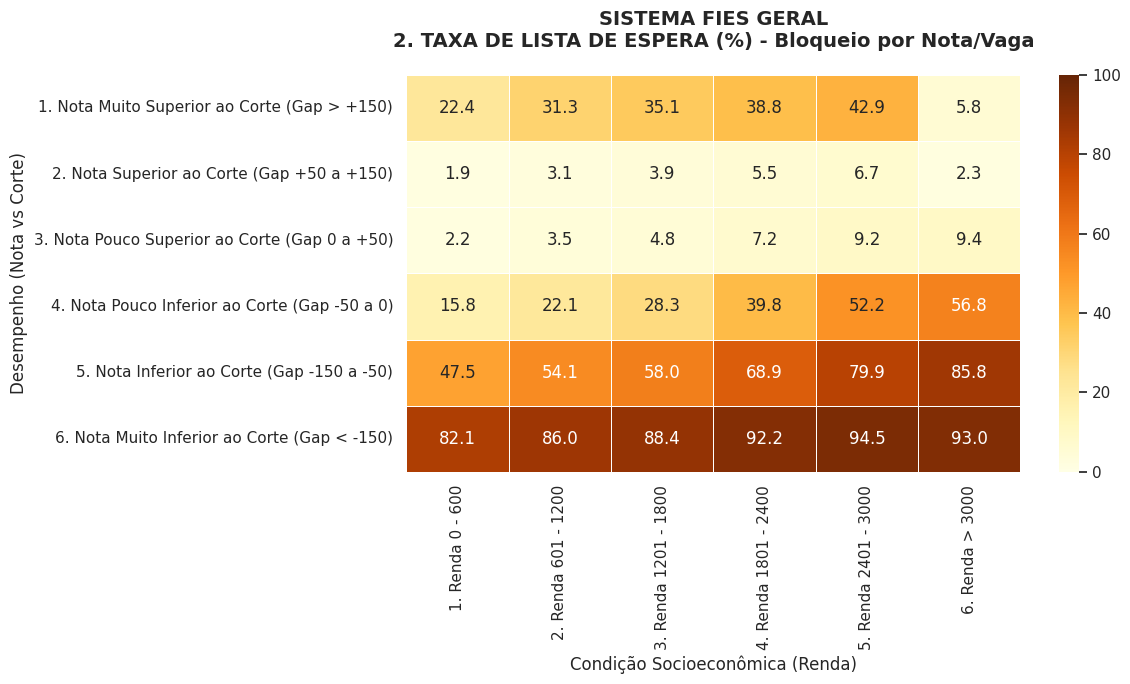

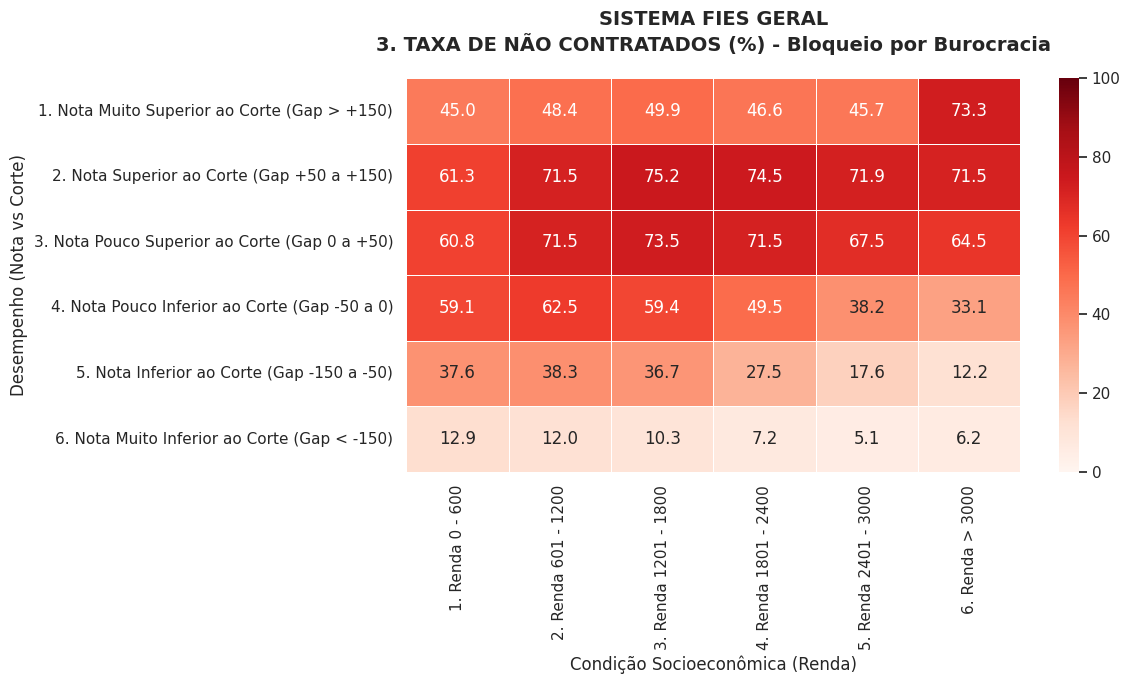

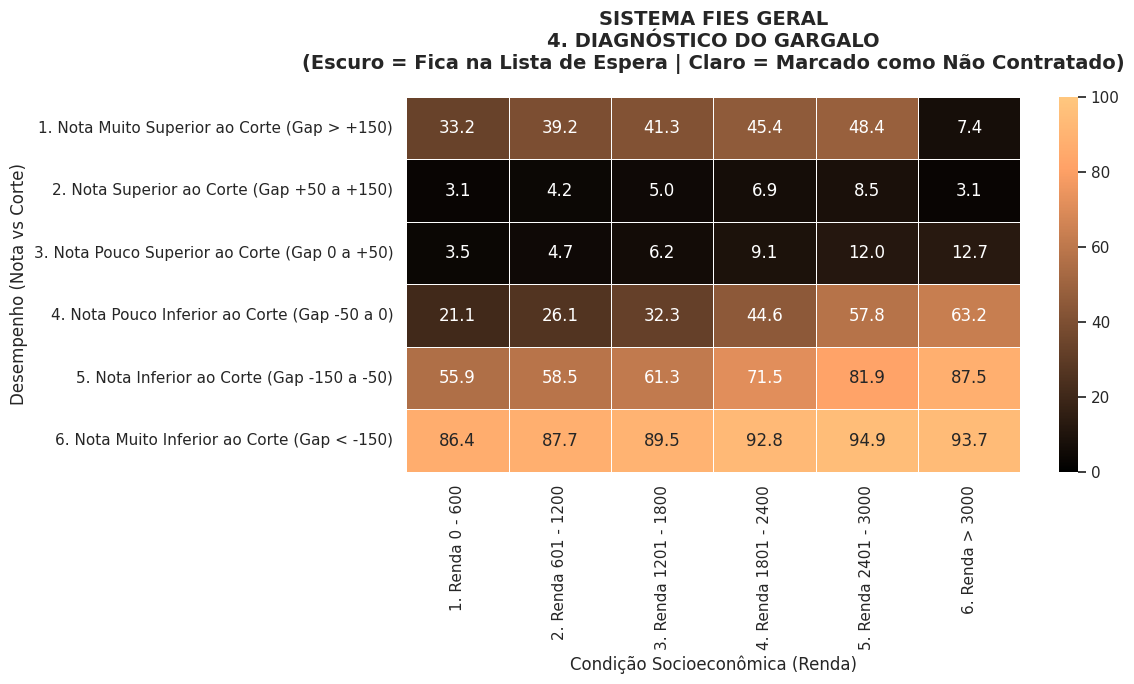

### DETECTADAS 10 ÁREAS NO CSV. INICIANDO GERAÇÃO... ###

--- Processando Área: Agricultura, silvicultura, pesca e veterinária ---


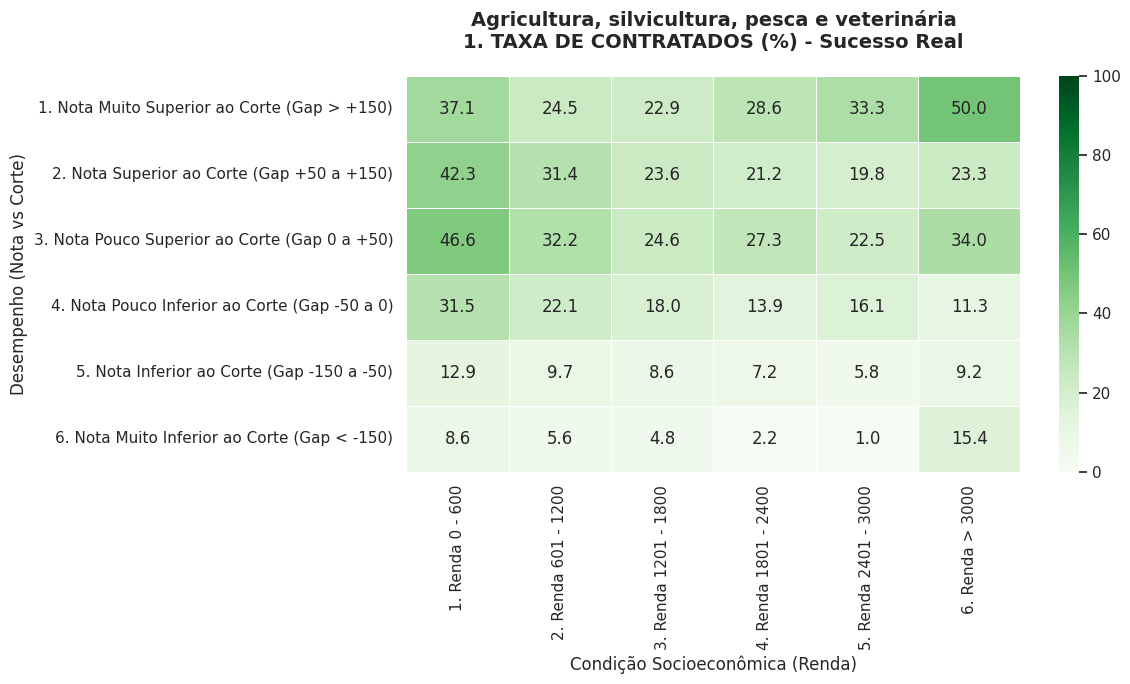

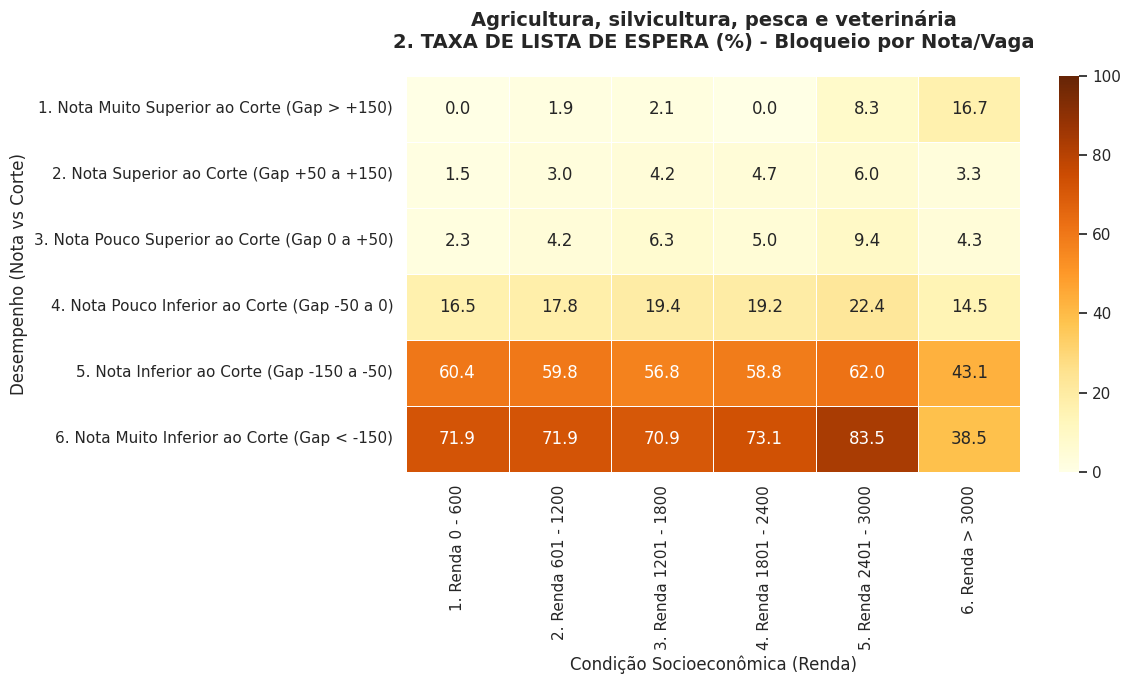

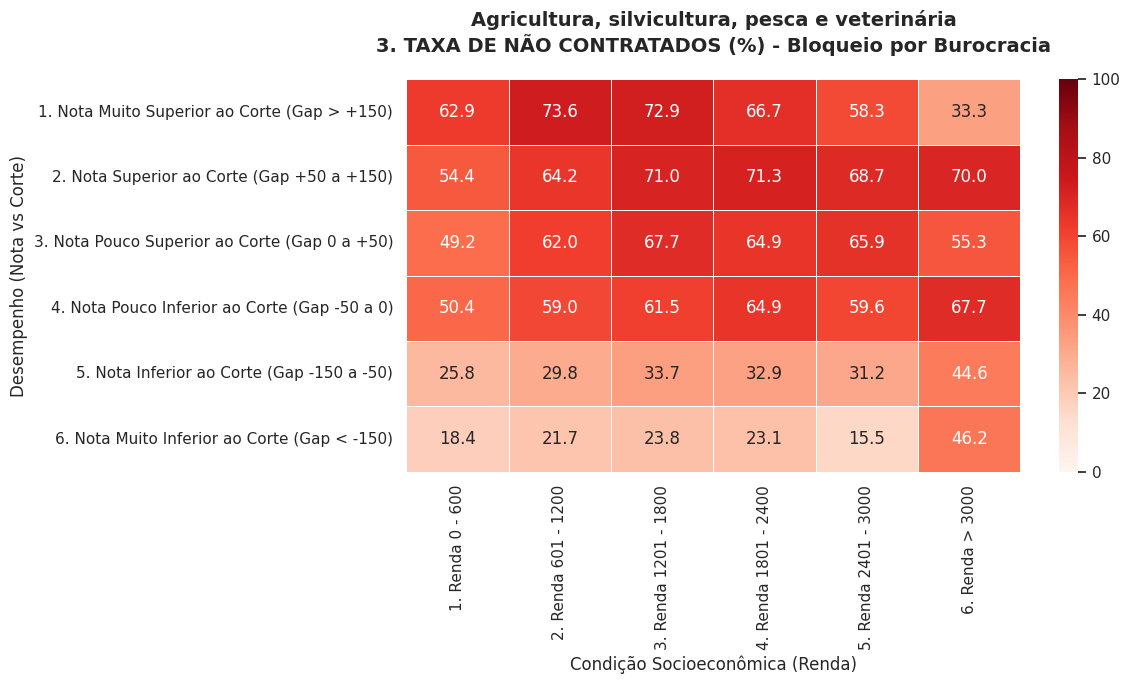

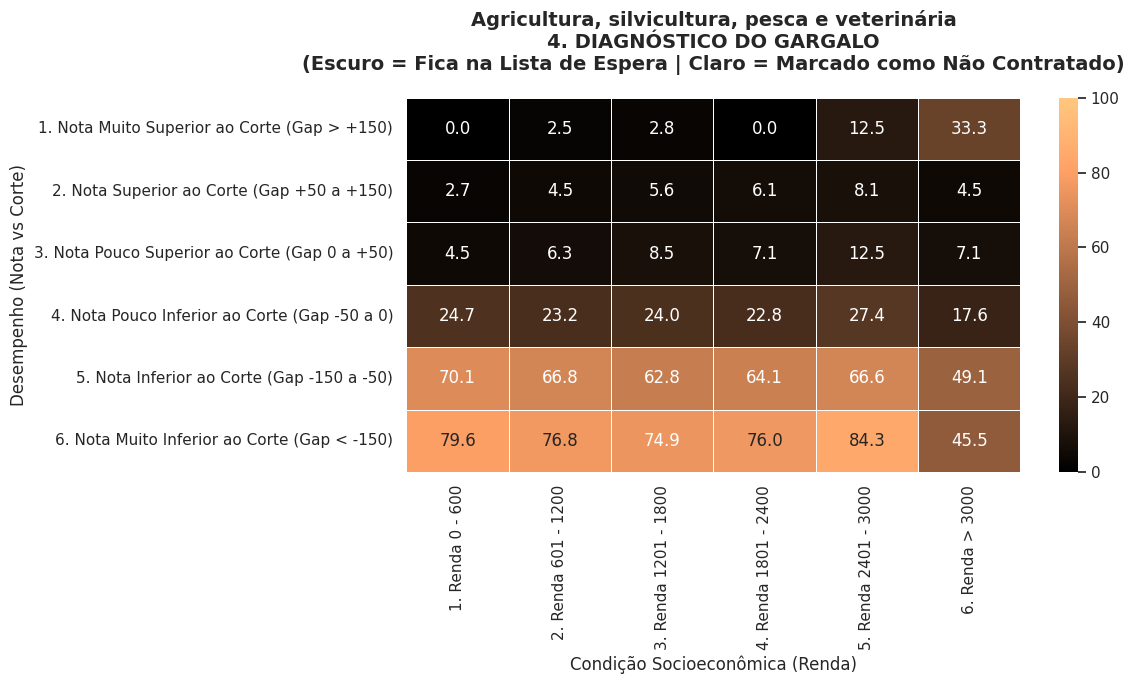


--- Processando Área: Artes e humanidades ---


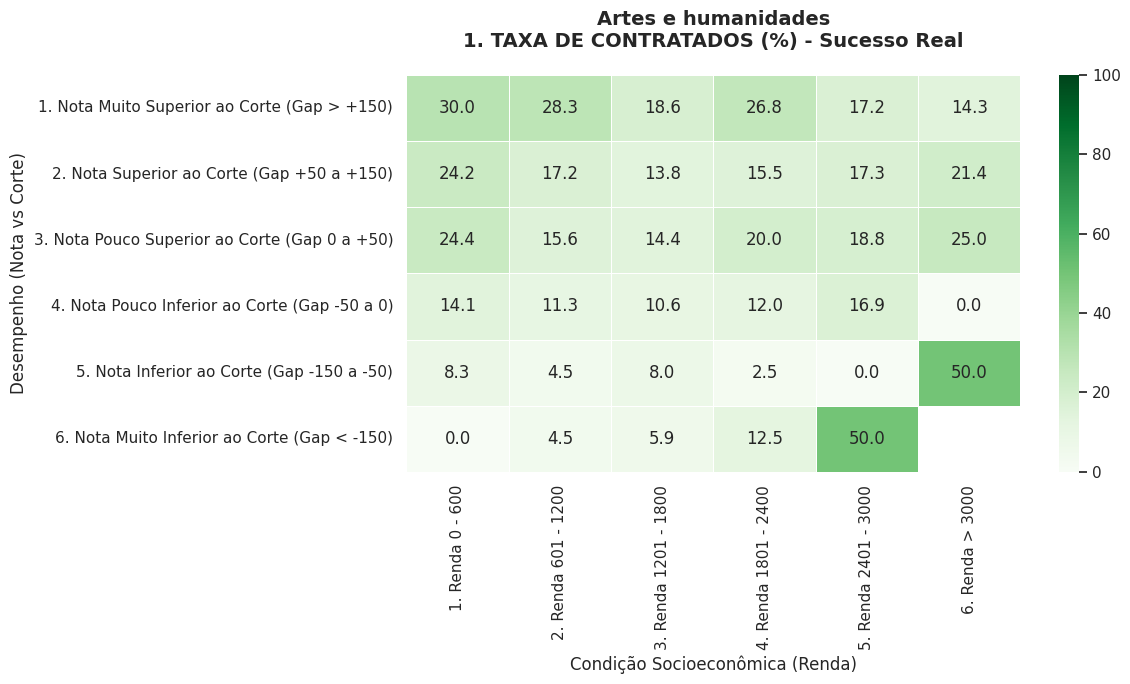

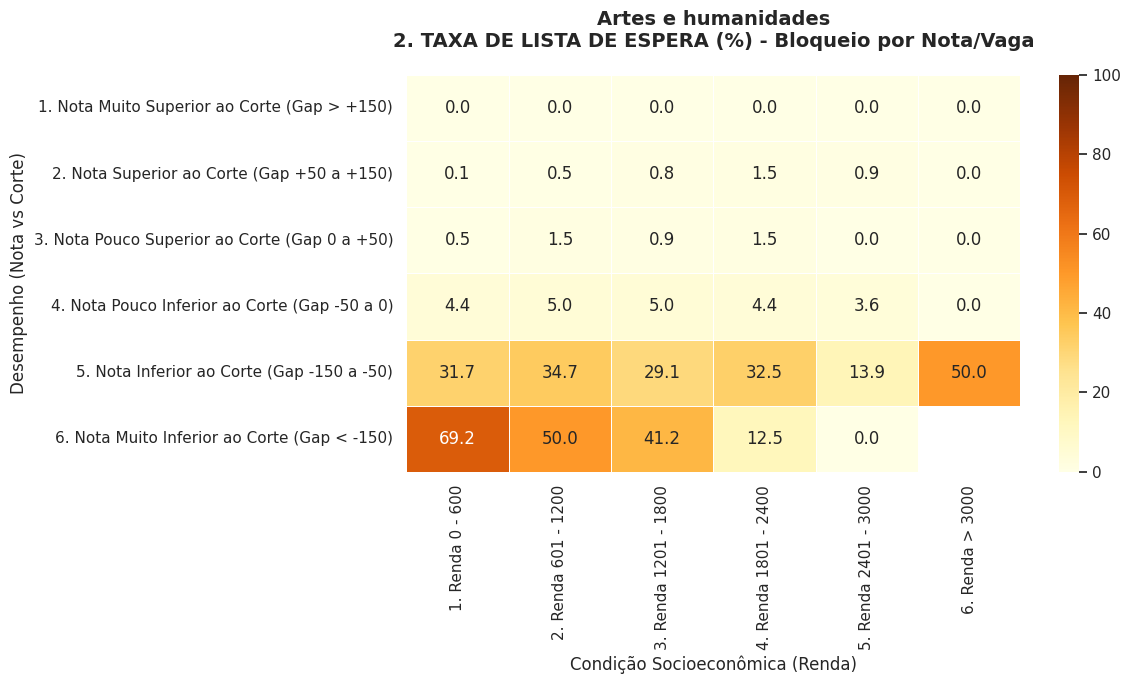

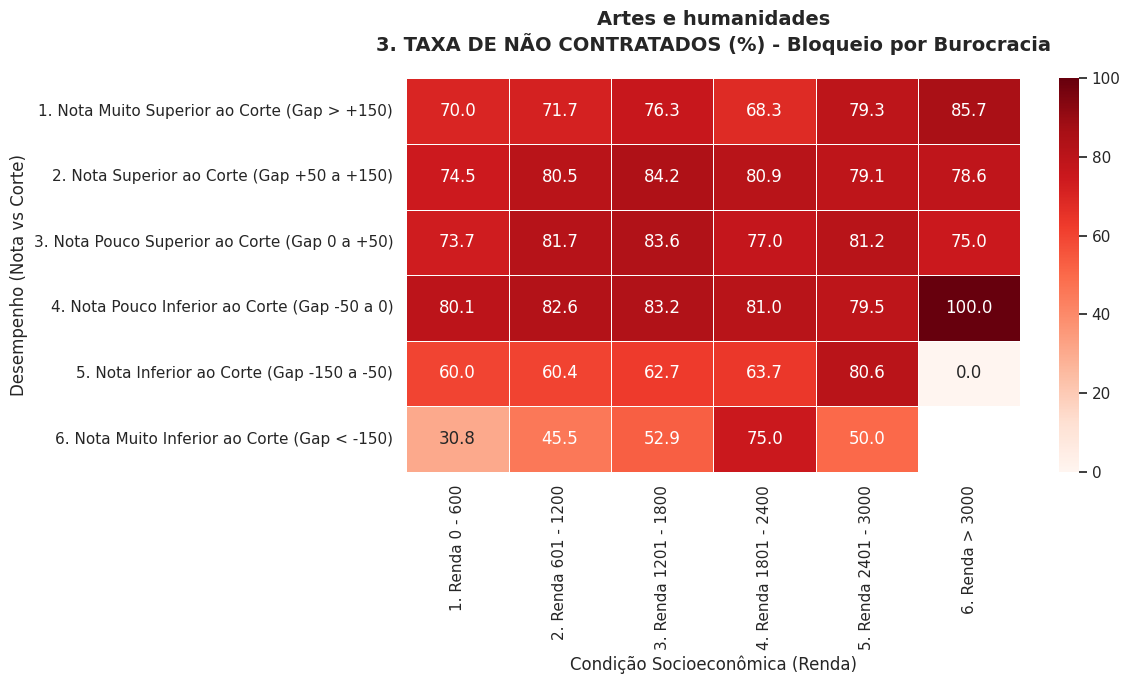

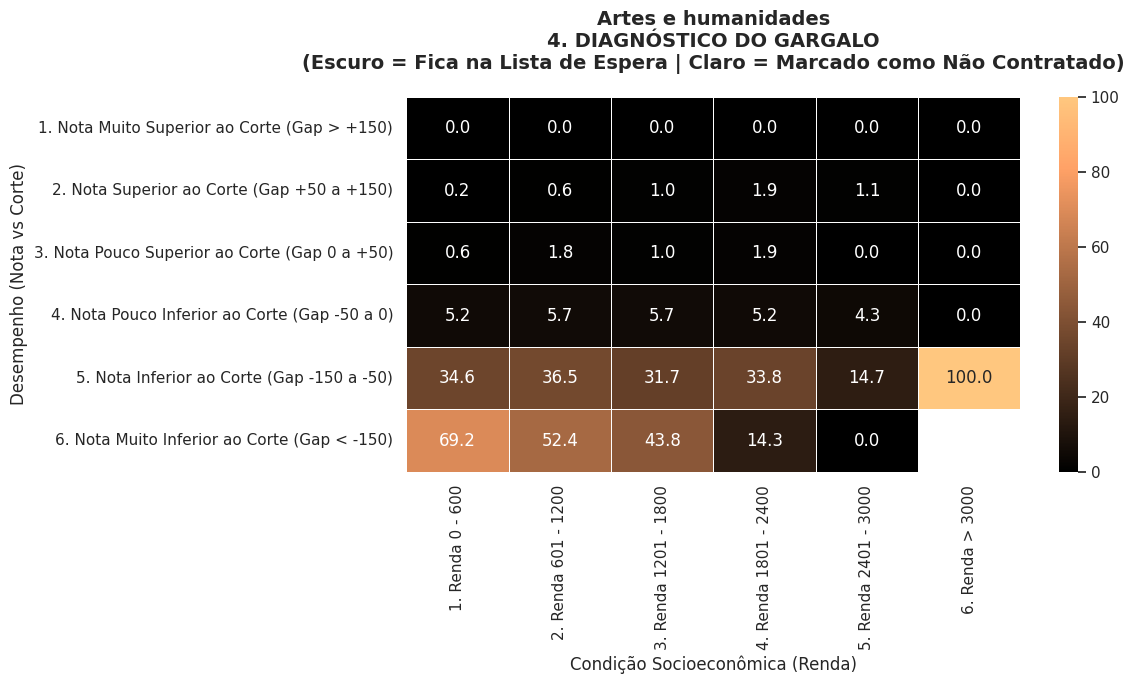


--- Processando Área: Ciências naturais, matemática e estatística ---


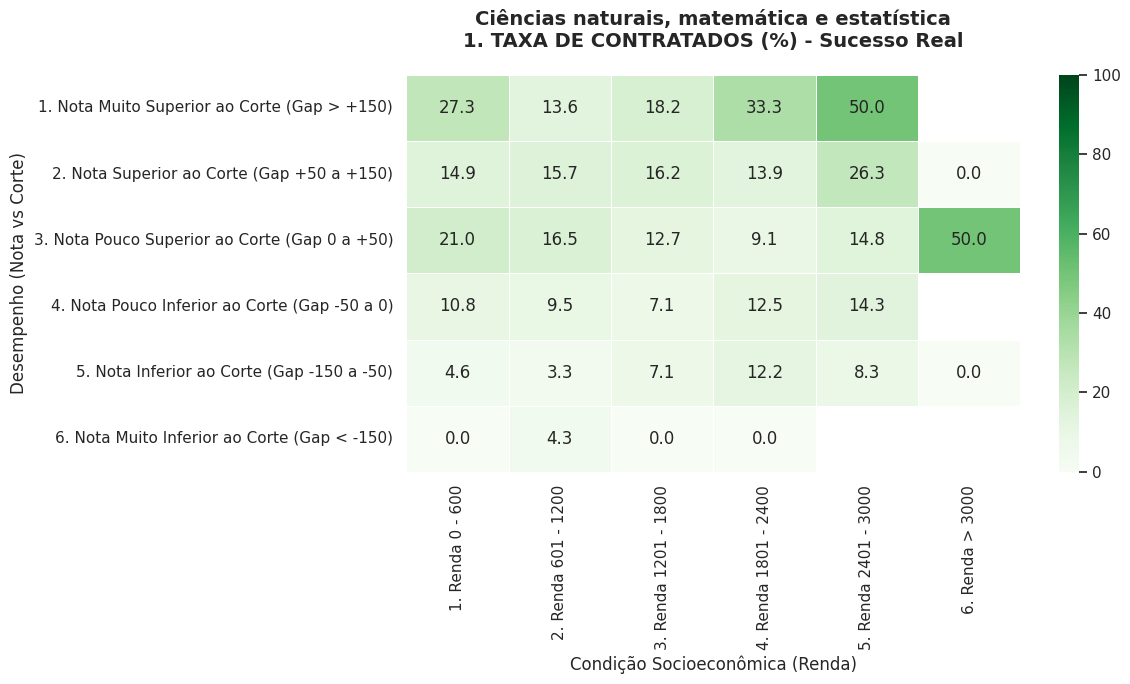

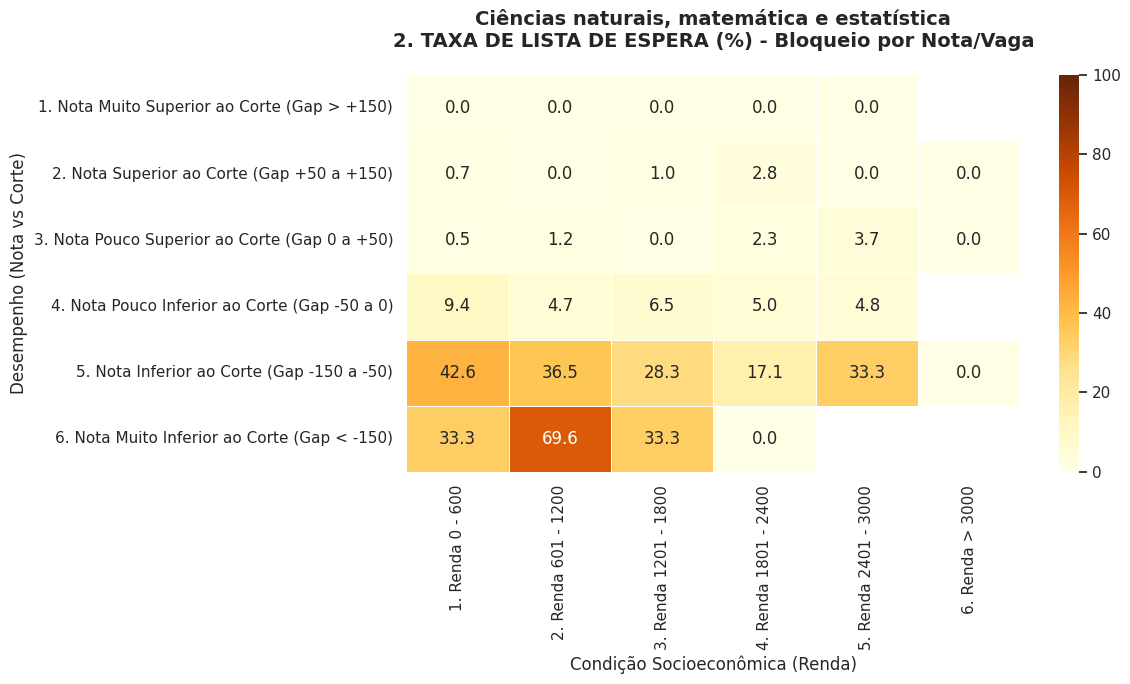

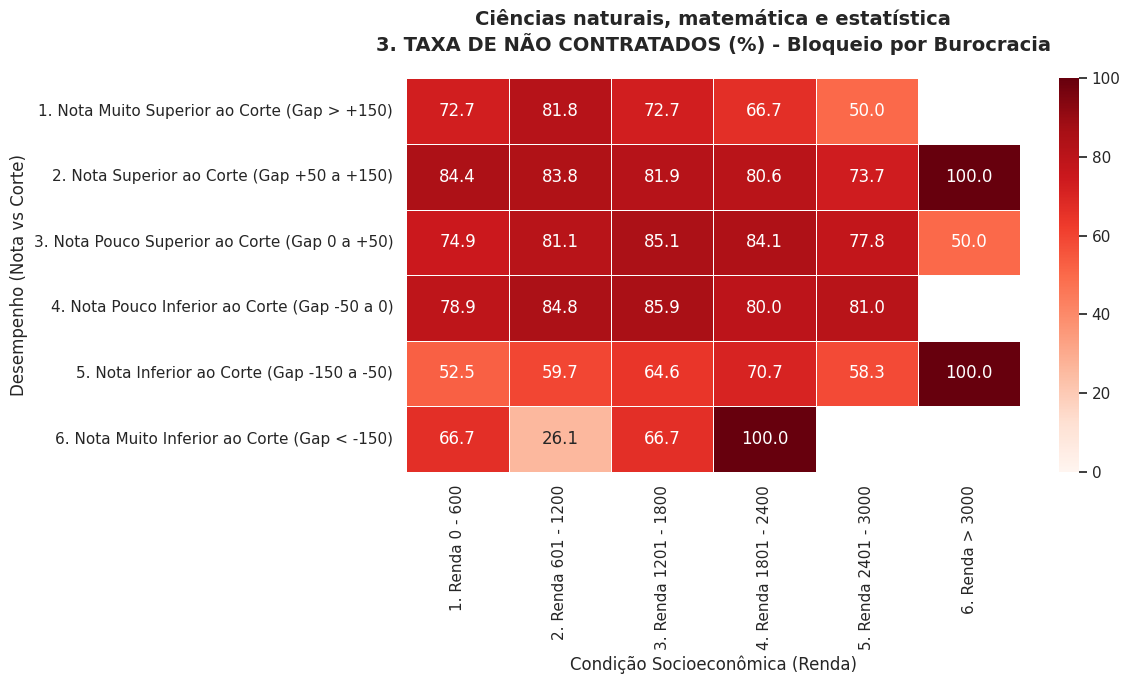

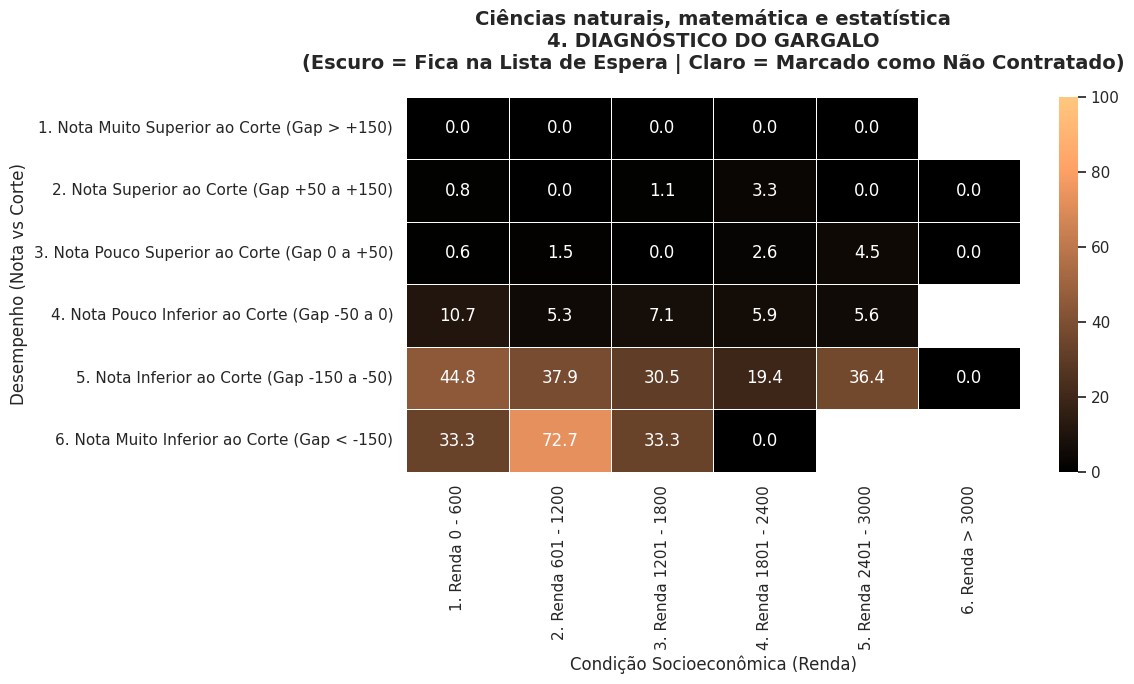


--- Processando Área: Ciências sociais, comunicação e informação ---


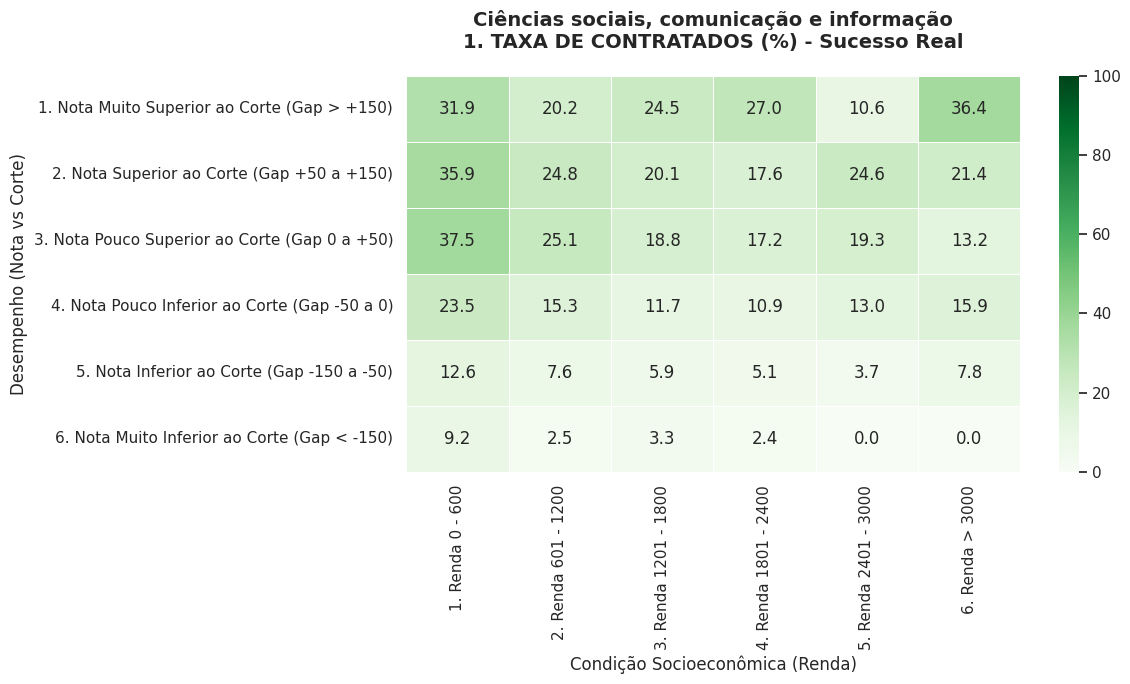

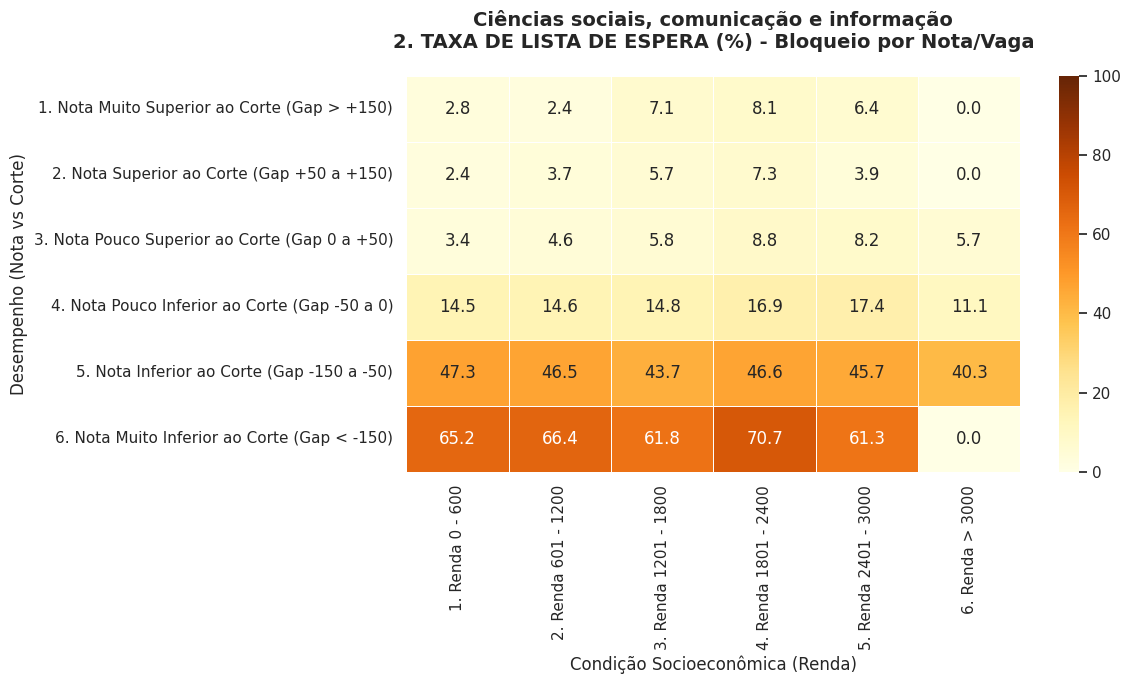

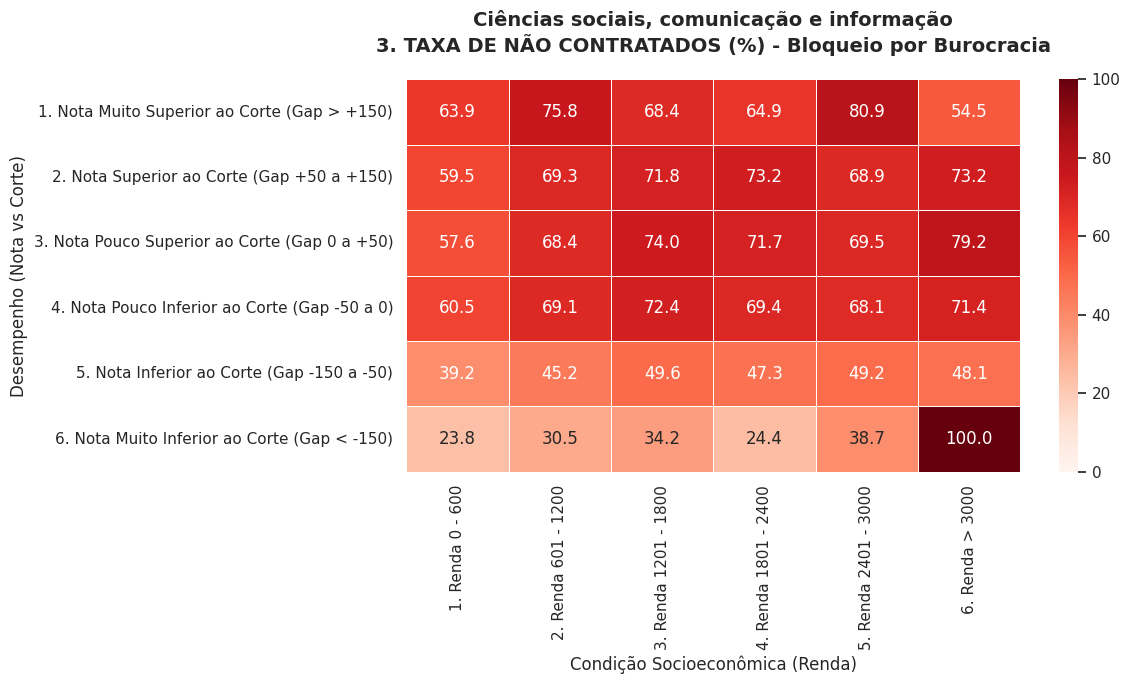

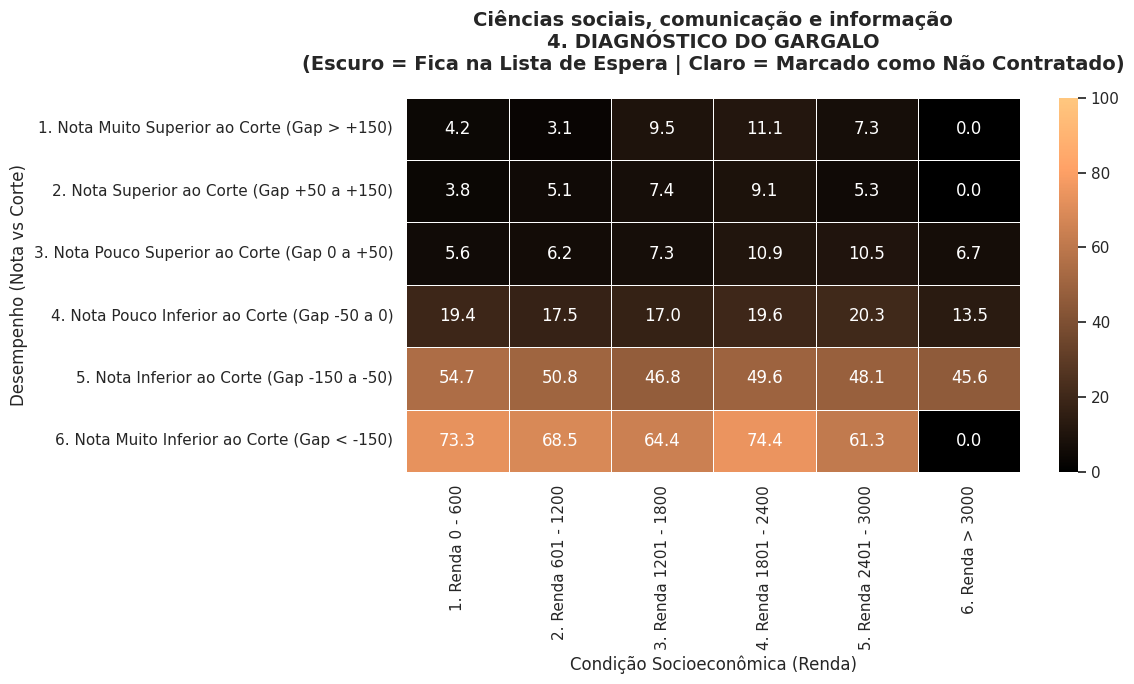


--- Processando Área: Computação e Tecnologias da Informação e Comunicação (TIC) ---


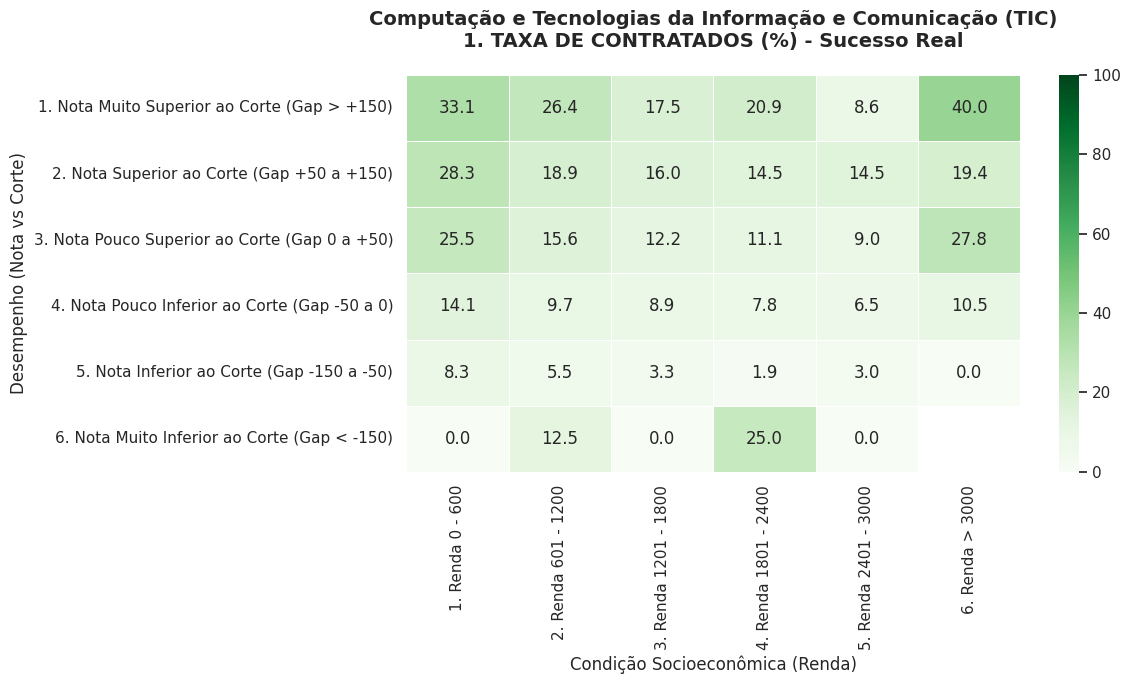

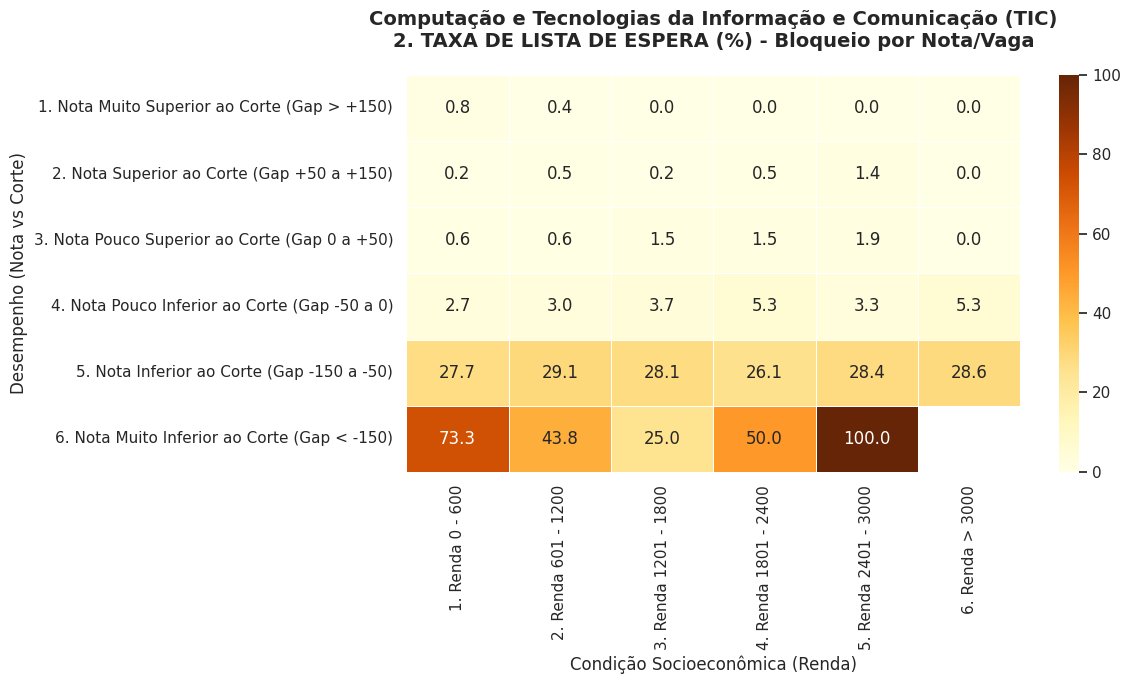

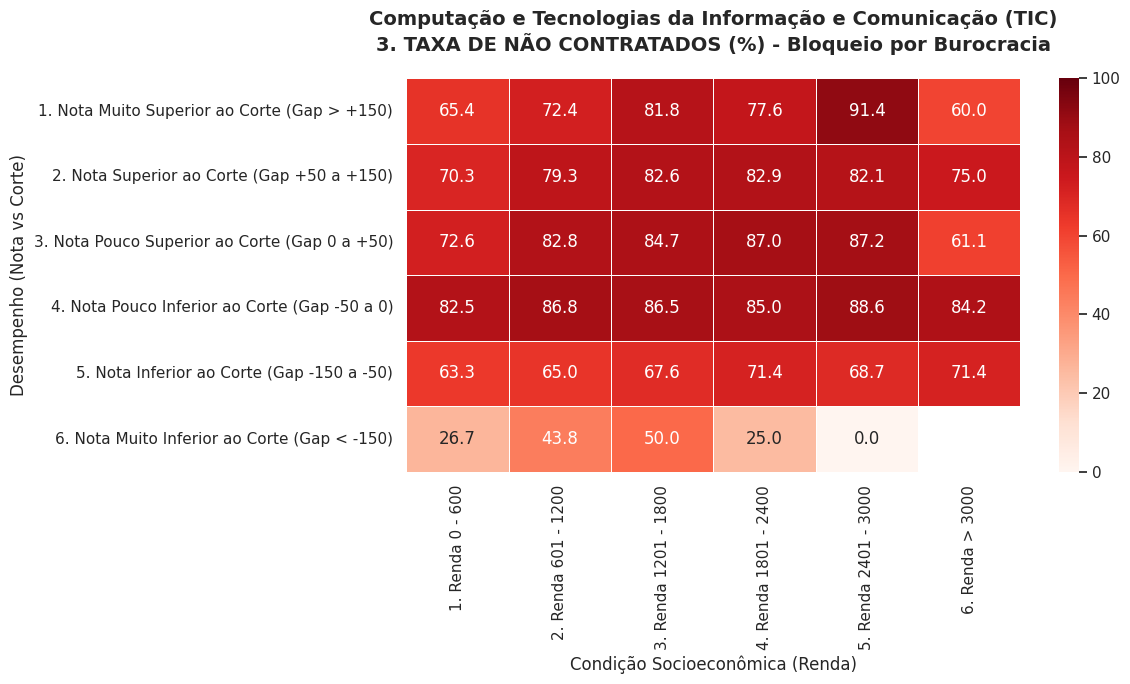

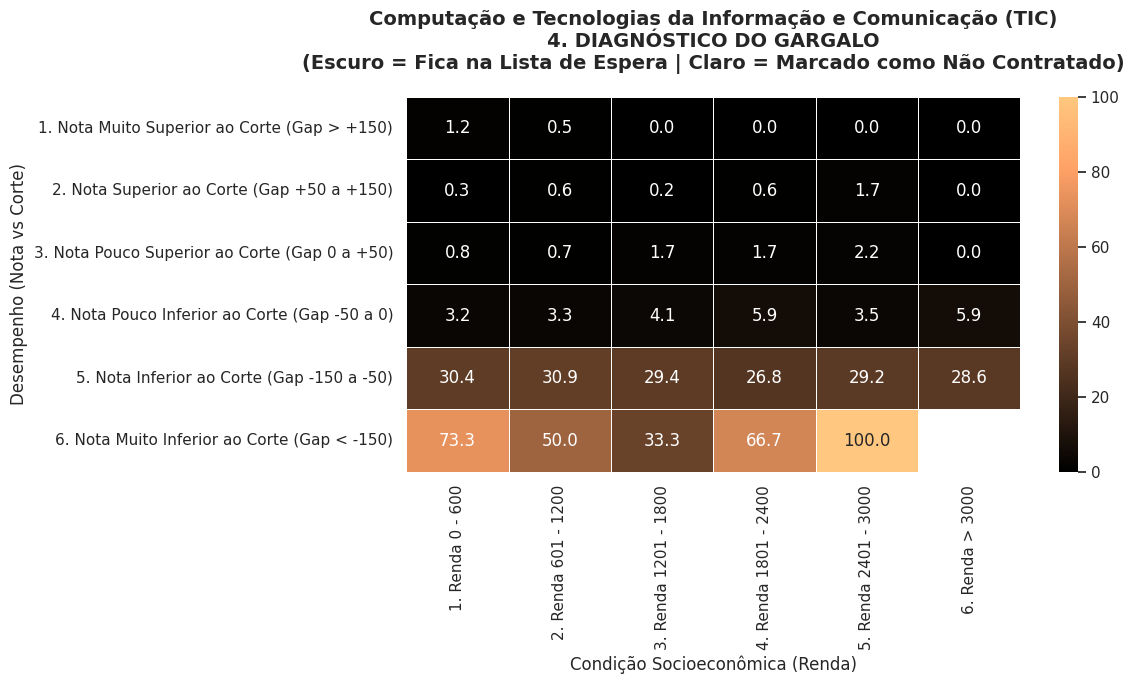


--- Processando Área: Educação ---


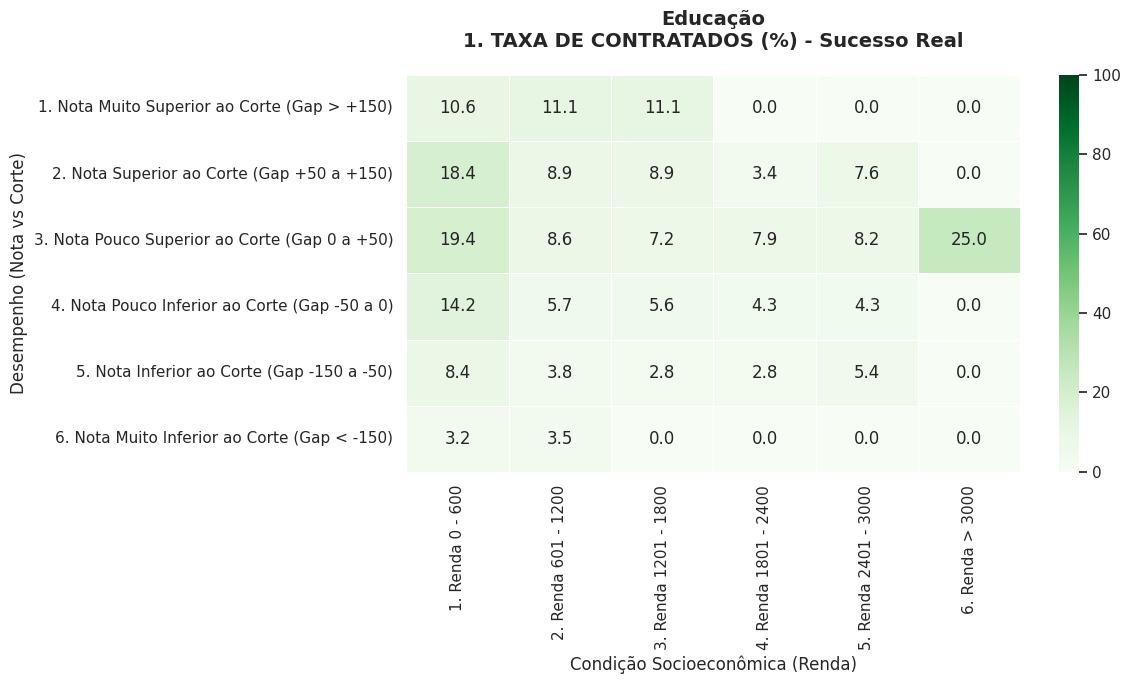

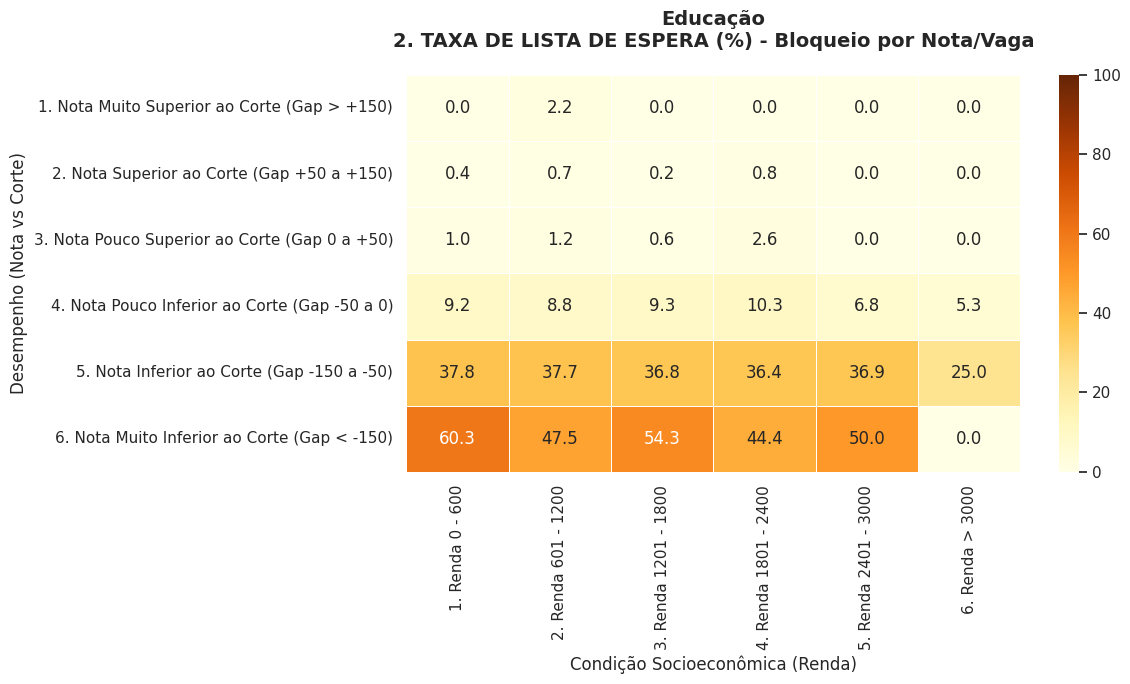

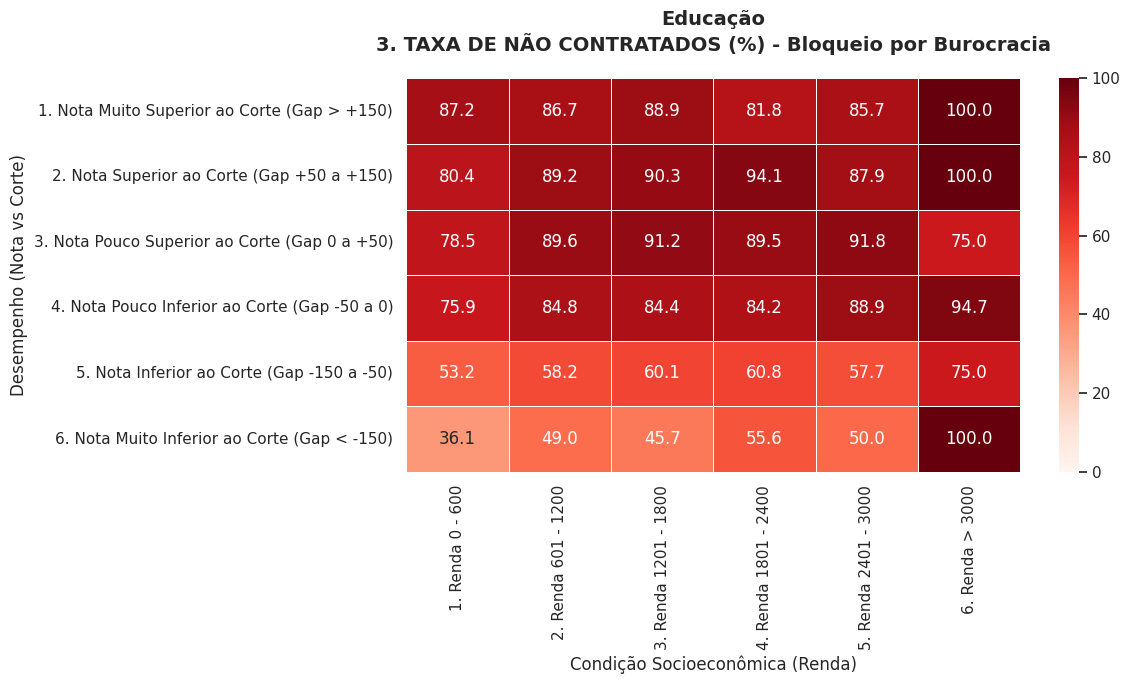

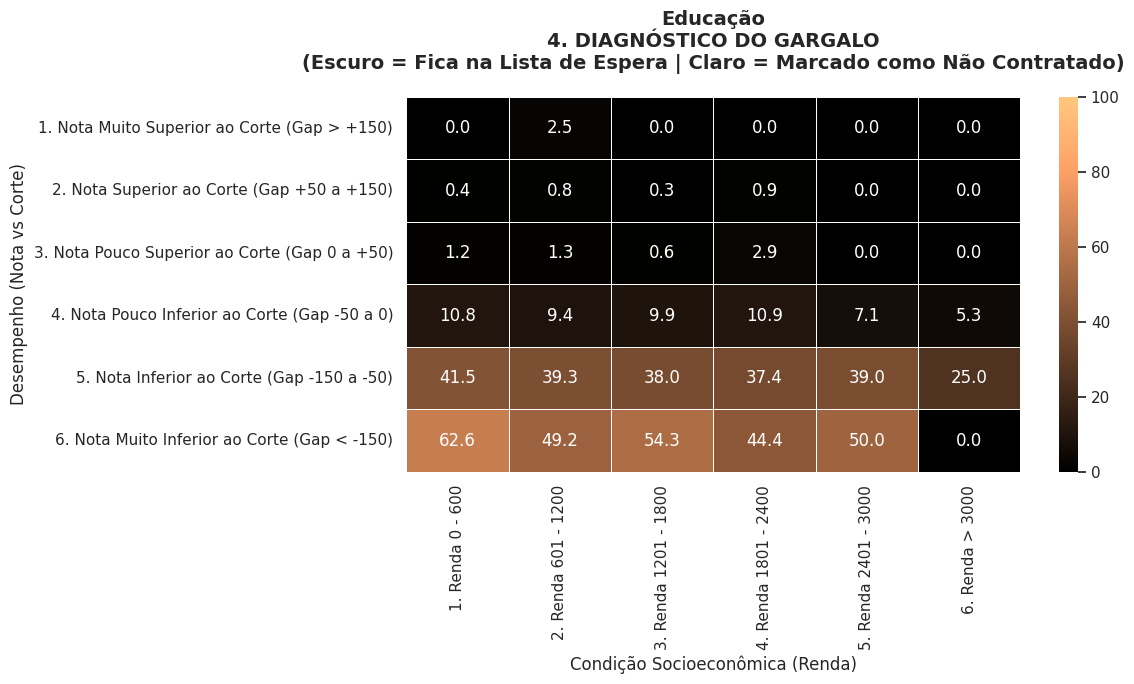


--- Processando Área: Engenharia, produção e construção ---


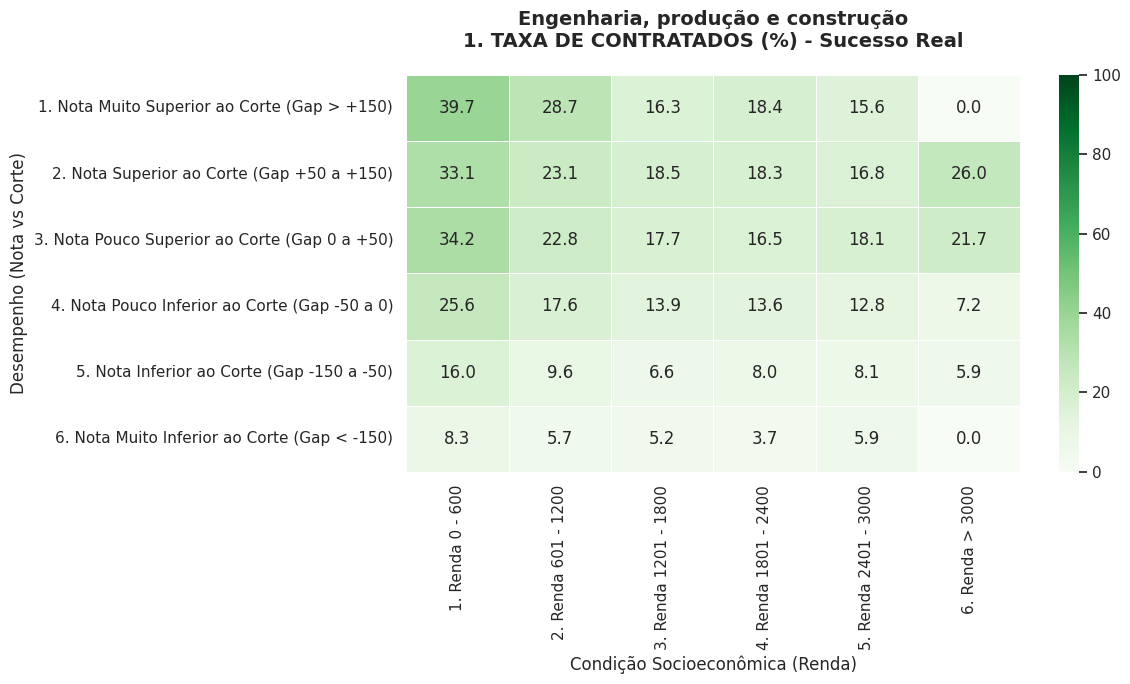

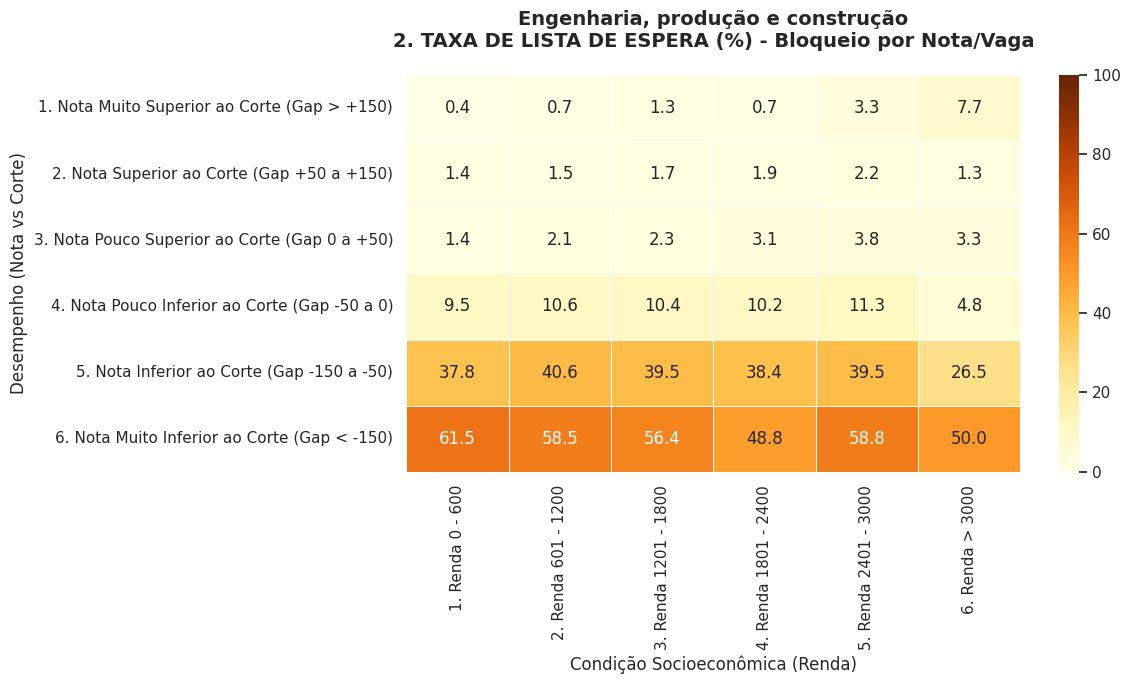

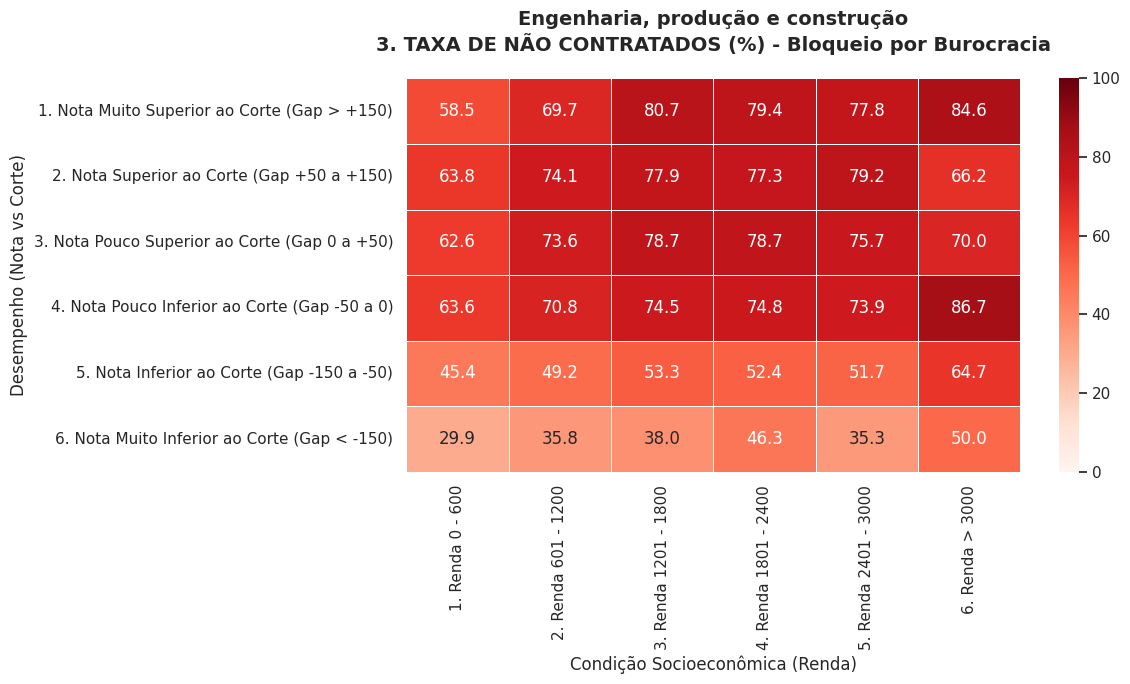

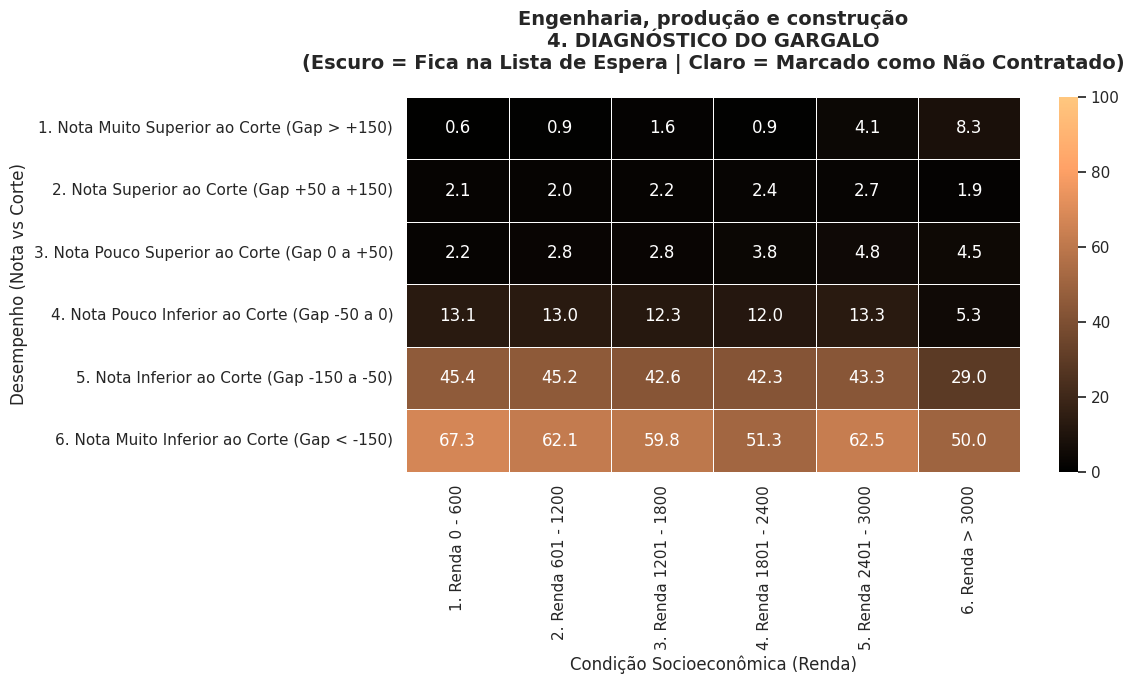


--- Processando Área: Negócios, administração e direito ---


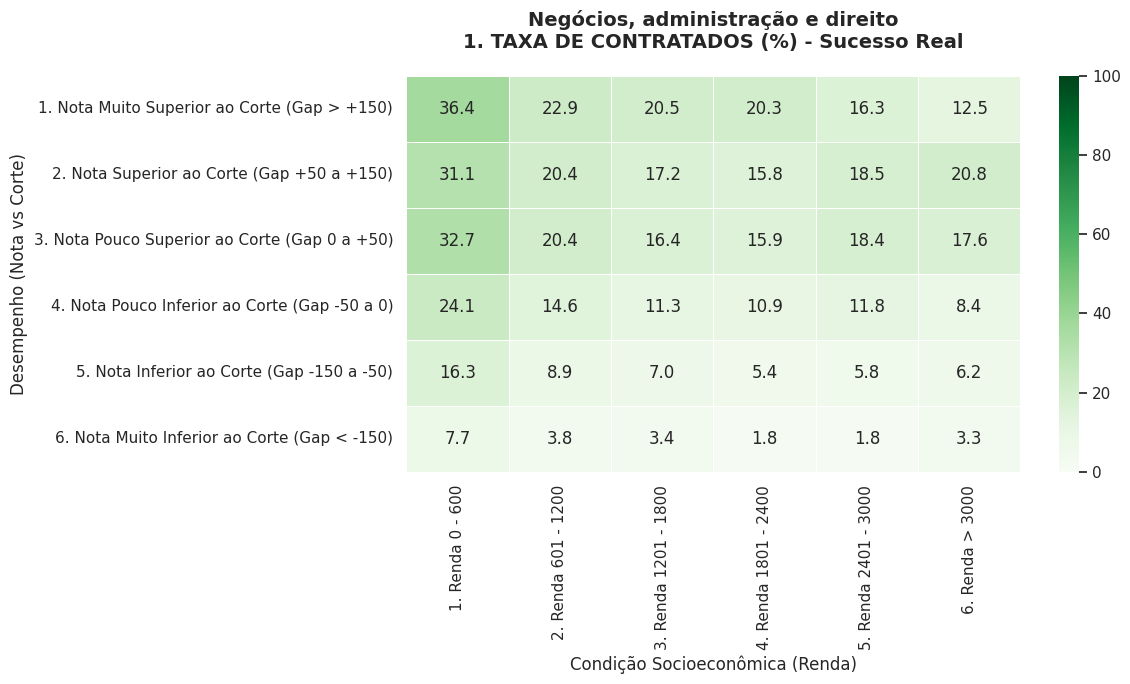

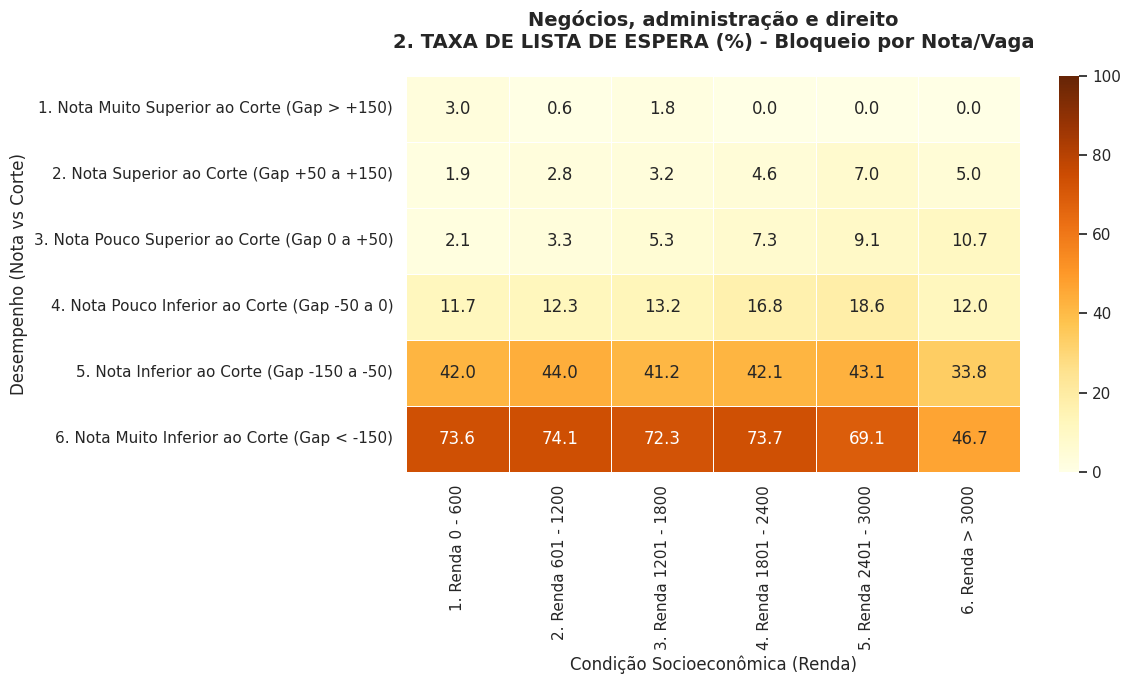

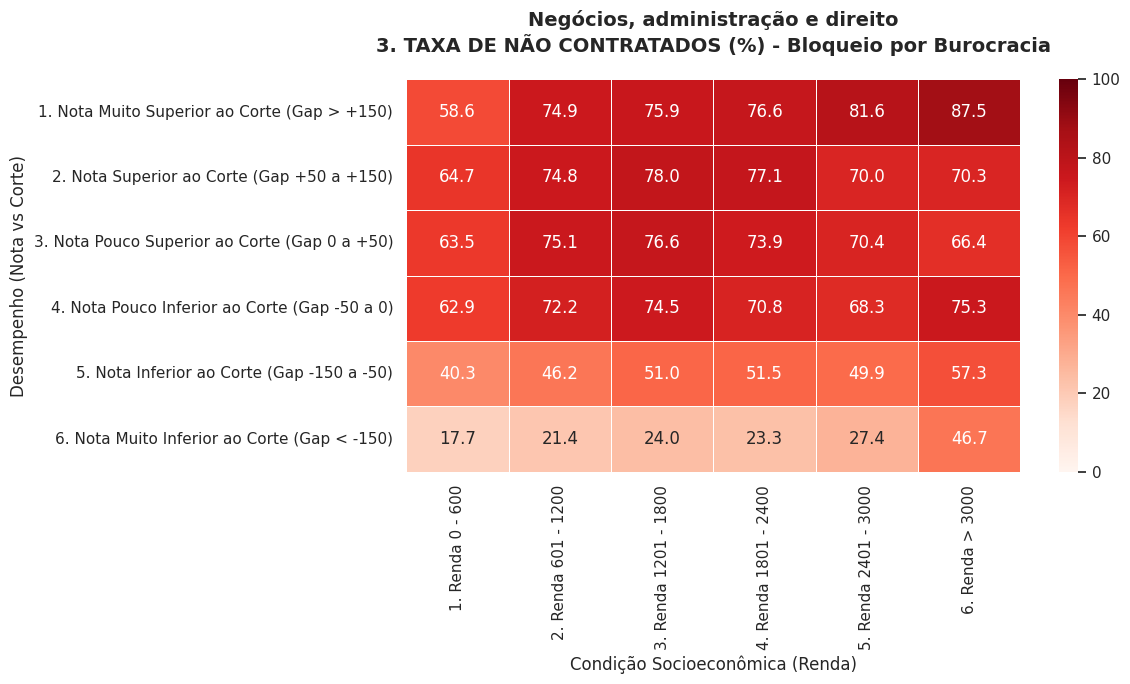

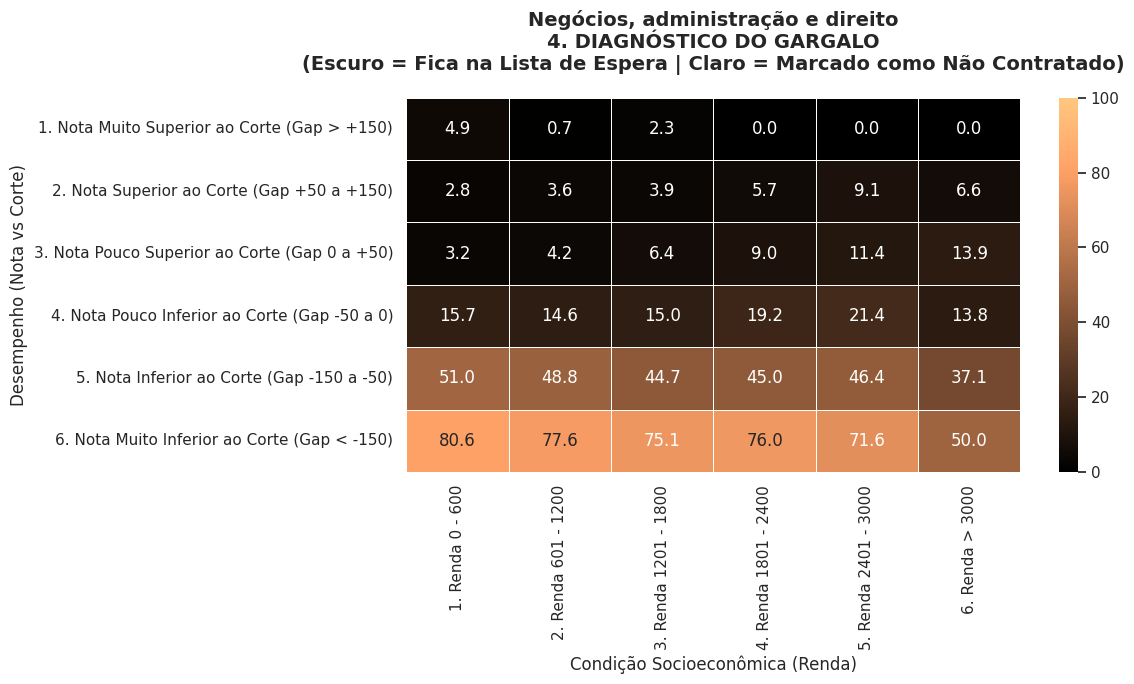


--- Processando Área: Saúde e bem-estar ---


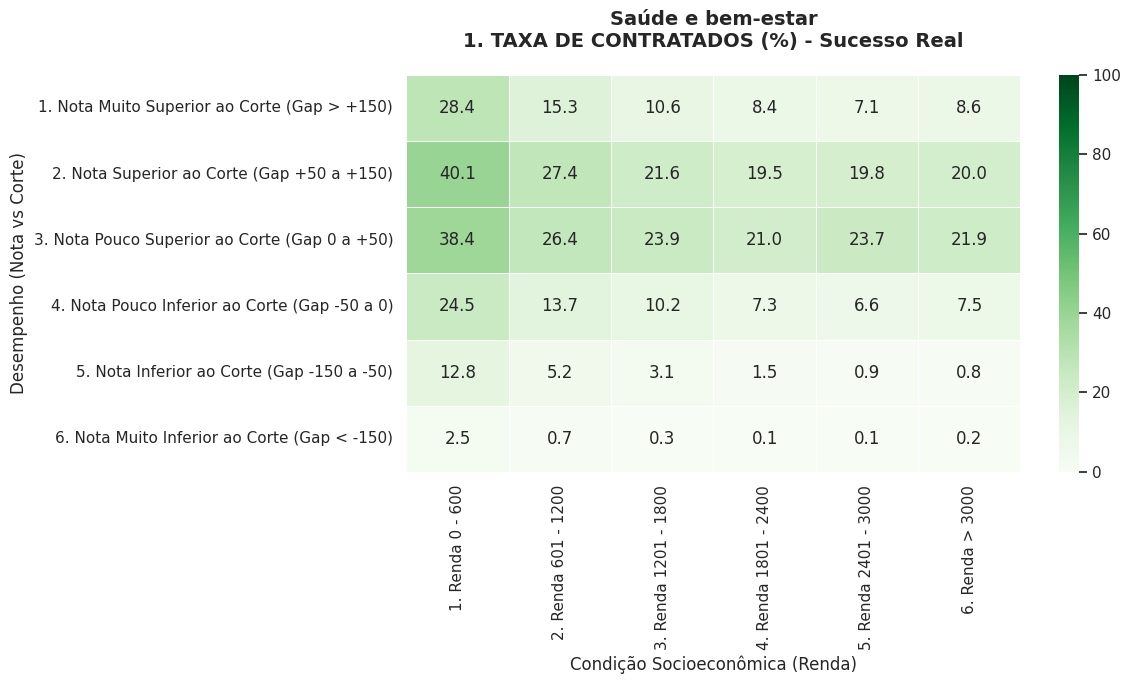

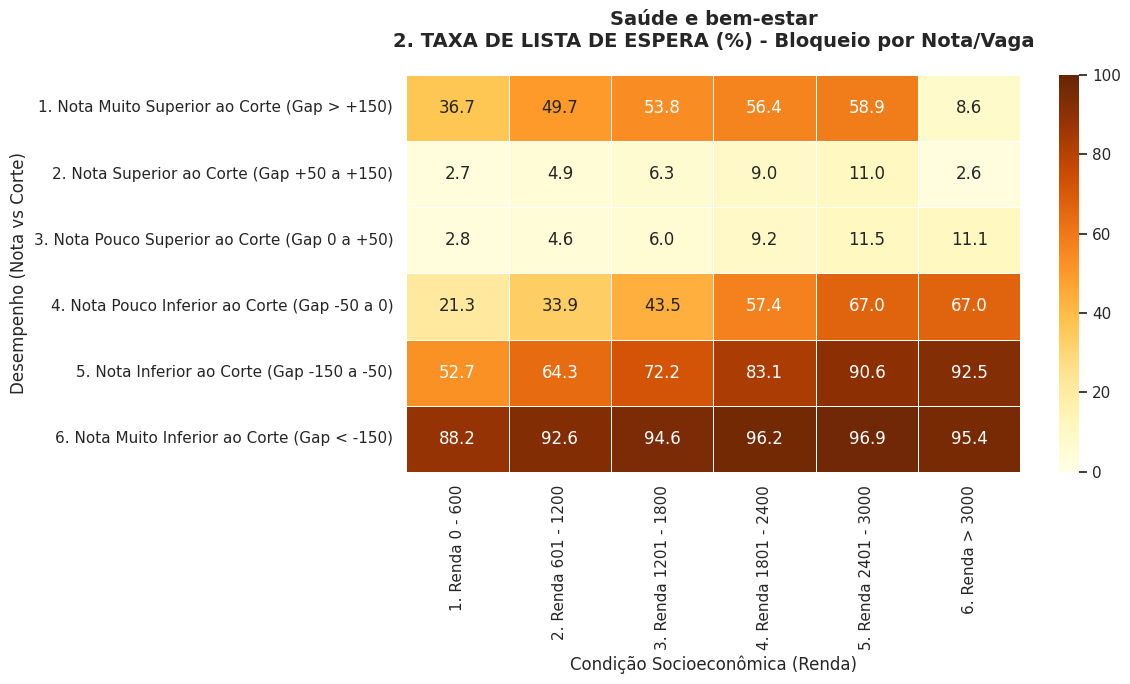

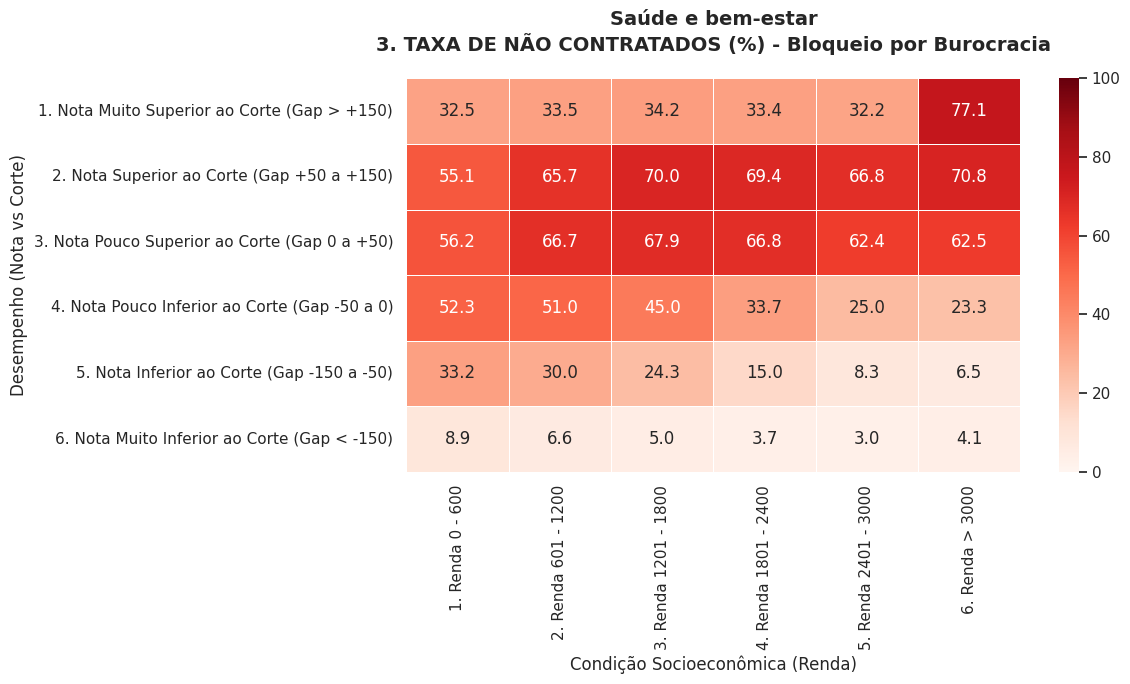

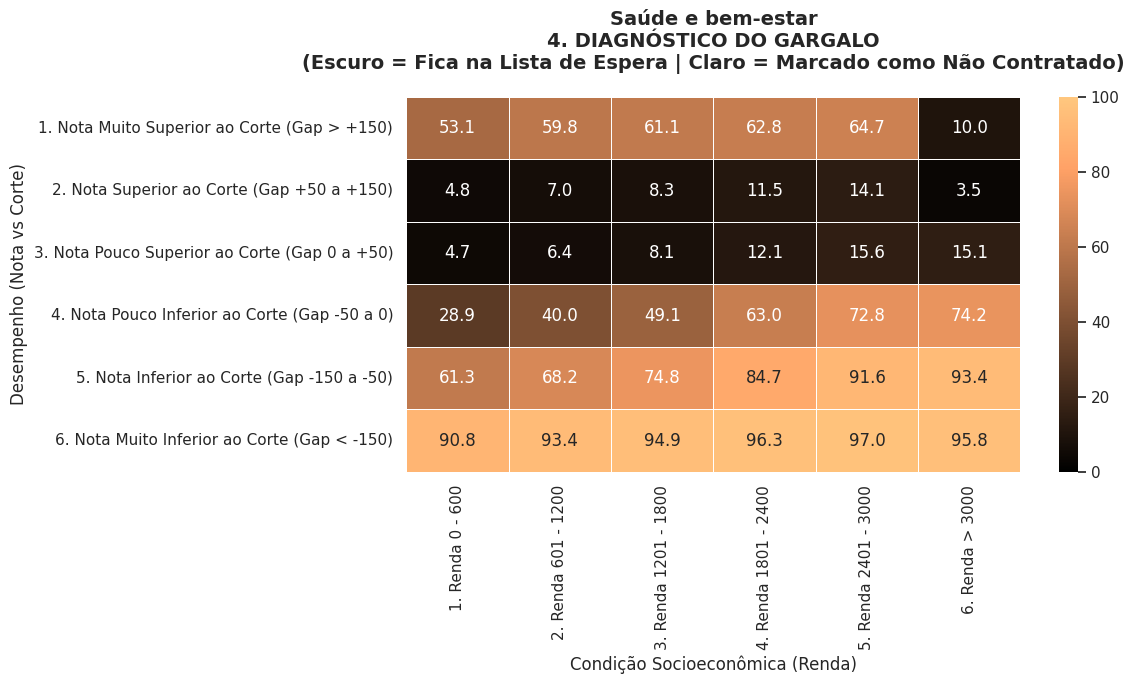


--- Processando Área: Serviços ---


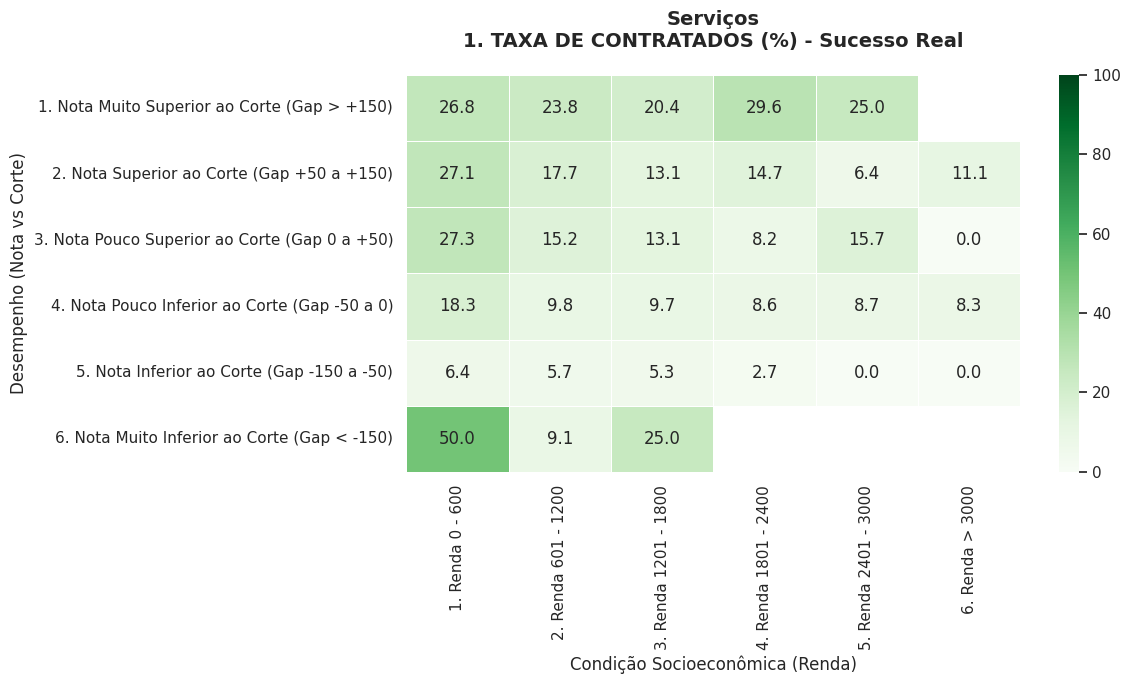

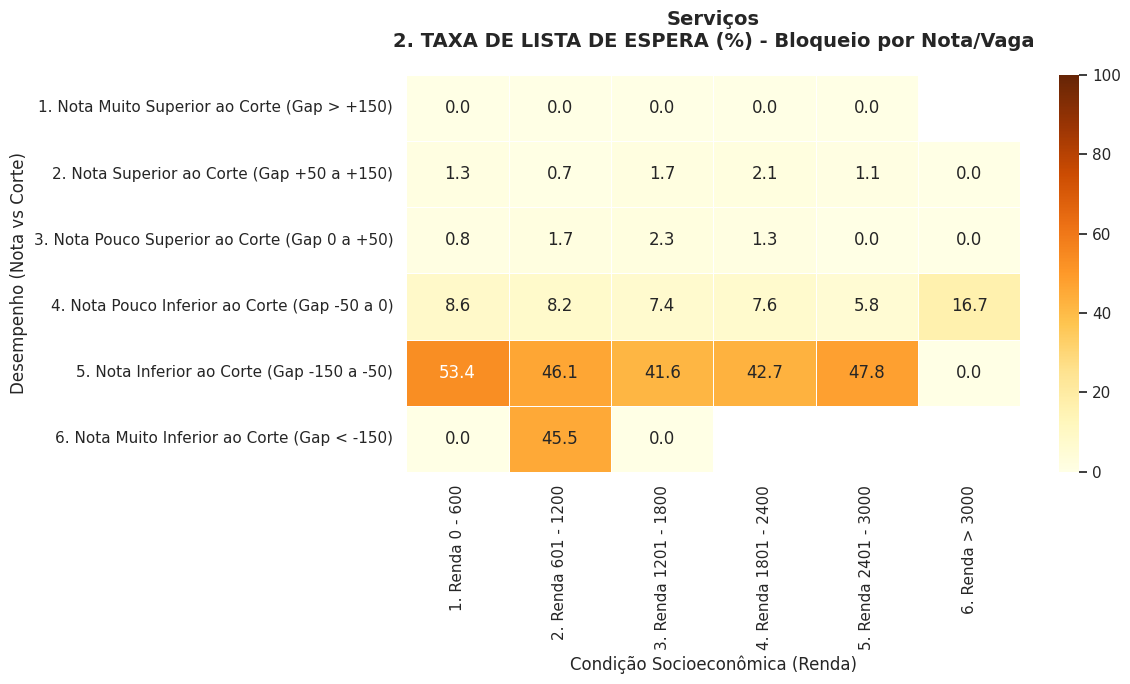

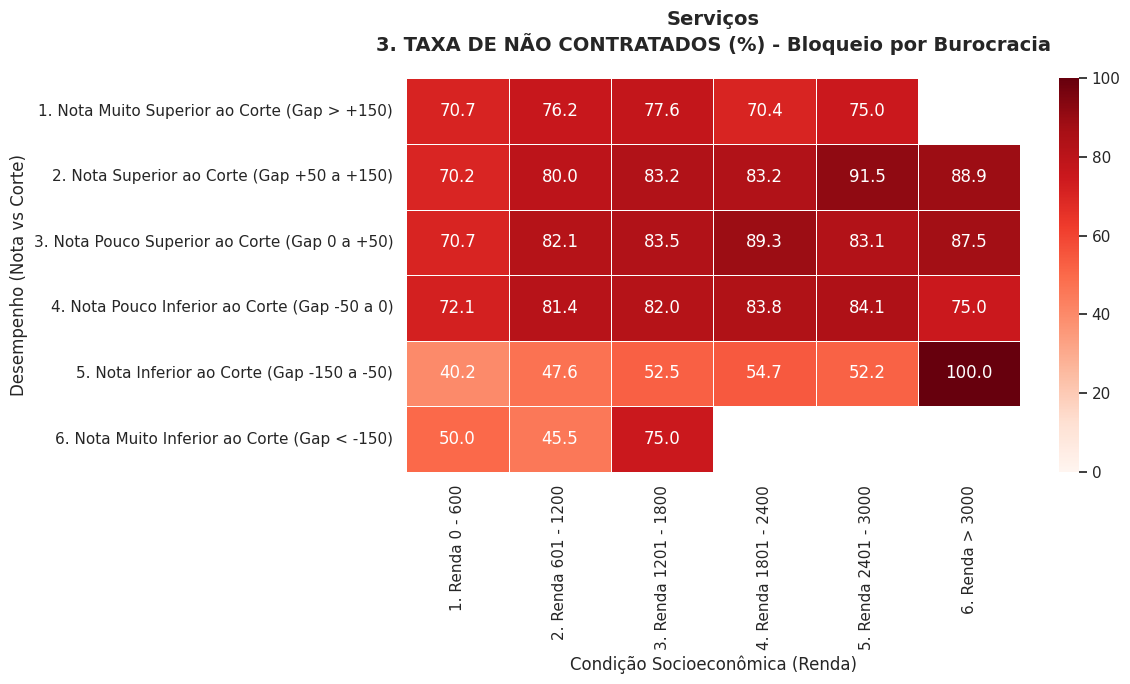

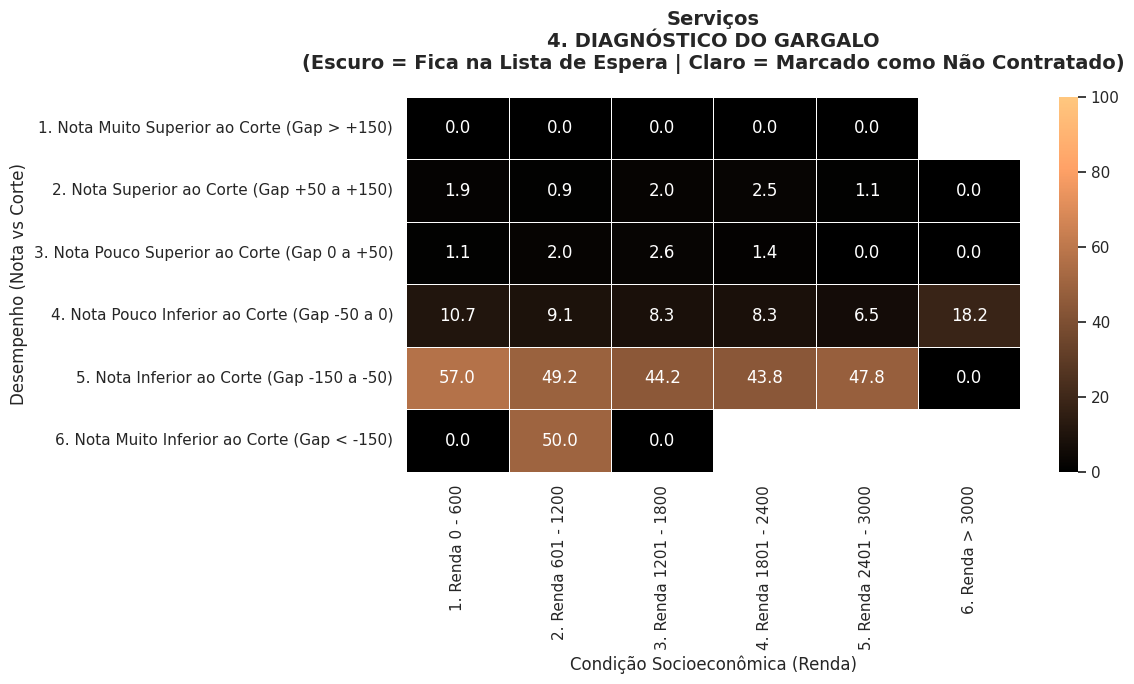


### PROCESSAMENTO CONCLUÍDO ###


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Configurações Visuais
sns.set_theme(style="white")
plt.rcParams['figure.figsize'] = (12, 7)

# 2. Carregamento do CSV (Caminho exato solicitado)
caminho = '../../../planilhas/processado/modulo_5/quem_ocupa_vaga/analise_quem_ocupa_vaga.csv'
df = pd.read_csv(caminho)

# 3. Padronização de Nomes e Tipos
df = df.rename(columns={'Qtd. Barrados Burocracia': 'Qtd. Não Contratados'})
cols_num = ['Total Candidatos', 'Qtd. Contratados', 'Qtd. Não Contratados', 'Qtd. Lista Espera']
for col in cols_num:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# 4. Ordens Fixas para os Eixos
ordem_nota = [
    '1. Nota Muito Superior ao Corte (Gap > +150)',
    '2. Nota Superior ao Corte (Gap +50 a +150)',
    '3. Nota Pouco Superior ao Corte (Gap 0 a +50)',
    '4. Nota Pouco Inferior ao Corte (Gap -50 a 0)',
    '5. Nota Inferior ao Corte (Gap -150 a -50)',
    '6. Nota Muito Inferior ao Corte (Gap < -150)'
]
ordem_renda = [
    '1. Renda 0 - 600', '2. Renda 601 - 1200', '3. Renda 1201 - 1800', 
    '4. Renda 1801 - 2400', '5. Renda 2401 - 3000', '6. Renda > 3000'
]

# 5. Função para Gerar os 4 Gráficos Separados
def gerar_estudo_detalhado(titulo, dados_agrupados):
    d = dados_agrupados.copy()
    d = d[d['Total Candidatos'] > 0]
    
    # Cálculos de Taxas sobre o Total de Inscritos de cada célula
    d['%_Contratado'] = (d['Qtd. Contratados'] / d['Total Candidatos'] * 100)
    d['%_Lista_Espera'] = (d['Qtd. Lista Espera'] / d['Total Candidatos'] * 100)
    d['%_Não_Contratado'] = (d['Qtd. Não Contratados'] / d['Total Candidatos'] * 100)
    
    # Diagnóstico: Dos que não entraram, quanto é culpa da fila?
    # Escuro (100%) = Culpa da Nota/Vaga | Claro (0%) = Culpa da Burocracia/Dinheiro
    d['Total_Insucesso'] = d['Qtd. Lista Espera'] + d['Qtd. Não Contratados']
    d['Predominancia_Espera'] = np.where(d['Total_Insucesso'] > 0, 
                                         (d['Qtd. Lista Espera'] / d['Total_Insucesso'] * 100), 0)

    configuracoes = [
        ('%_Contratado', 'Greens', '1. TAXA DE CONTRATADOS (%) - Sucesso Real'),
        ('%_Lista_Espera', 'YlOrBr', '2. TAXA DE LISTA DE ESPERA (%) - Bloqueio por Nota/Vaga'),
        ('%_Não_Contratado', 'Reds', '3. TAXA DE NÃO CONTRATADOS (%) - Bloqueio por Burocracia'),
        ('Predominancia_Espera', 'copper', '4. DIAGNÓSTICO DO GARGALO\n(Escuro = Fica na Lista de Espera | Claro = Marcado como Não Contratado)')
    ]

    for metrica, cor, legenda in configuracoes:
        plt.figure(figsize=(12, 7))
        matriz = d.pivot(index='Nível da Nota (Gap)', columns='Faixa de Renda', values=metrica)
        matriz = matriz.reindex(index=ordem_nota, columns=ordem_renda)
        
        sns.heatmap(matriz, annot=True, fmt=".1f", cmap=cor, vmin=0, vmax=100, linewidths=.5)
        plt.title(f"{titulo}\n{legenda}", fontsize=14, fontweight='bold', pad=20)
        plt.ylabel('Desempenho (Nota vs Corte)')
        plt.xlabel('Condição Socioeconômica (Renda)')
        plt.tight_layout()
        plt.show()

# 6. EXECUÇÃO 1: GERAL (TODAS AS ÁREAS SOMADAS)
print("### INICIANDO GERAÇÃO: ANÁLISE GERAL DO SISTEMA ###")
df_geral = df.groupby(['Faixa de Renda', 'Nível da Nota (Gap)'], observed=False)[cols_num].sum().reset_index()
gerar_estudo_detalhado("SISTEMA FIES GERAL", df_geral)

# 7. EXECUÇÃO 2: TODAS AS ÁREAS INDIVIDUAIS
areas_unicas = df['Área do Conhecimento'].unique()
print(f"### DETECTADAS {len(areas_unicas)} ÁREAS NO CSV. INICIANDO GERAÇÃO... ###")

for area in areas_unicas:
    print(f"\n--- Processando Área: {area} ---")
    df_area = df[df['Área do Conhecimento'] == area].groupby(
        ['Faixa de Renda', 'Nível da Nota (Gap)'], observed=False
    )[cols_num].sum().reset_index()
    
    gerar_estudo_detalhado(area, df_area)

print("\n### PROCESSAMENTO CONCLUÍDO ###")